### Background and Context

"Visit with us" travel company wants to retain its customers for a longer time period by launching a long-term travel package. The company had launched a holiday package last year and 18% of the customers purchased that package however, the marketing cost was quite high because customers were contacted at random without looking at the available information.

Now again the company is planning to launch a new product i.e. a long term travel package, but this time company wants to utilize previously available data to reduce the marketing cost

You as a data scientist at "Visit with us" travel company have to analyze the trend of existing customers' data and information to provide recommendations to the marketing team and also build a model to predict which customer is potentially going to purchase the long term travel package.

### Objective

* Explore and visualize the dataset.
* To predict which customers will purchase the long term travel package
* Which variables are most significant.
* Build Models using Bagging & Boosting to predict whether a person will take travel package or not
* Generate a set of insights and recommendations that will help the business to understand which segment of customers should be targeted more.


### Data Set

**Customer details:**

* CustomerID: Unique customer ID
* ProdTaken: Product taken flag
* Age: Age of customer
* PreferredLoginDevice: Preferred login device of the customer in last month
* CityTier: City tier
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisited: Total number of person came with customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of the trip in a year by customer
* Passport: Customer passport flag
* OwnCar: Customers owns a car flag
* NumberOfChildrenVisited: Total number of children visit with customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:**

* PitchSatisfactionScore: Sales pitch satisfactory score
* ProductPitched: Product pitched by a salesperson
* NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
* DurationOfPitch: Duration of the pitch by a salesman to customer

## Index

- <a href = #link1>Overview of the dataset</a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Insights Based on EDA</a>


- <a href = #link4>Missing value Detection and Treatment</a>


- <a href = #link5>Outlier Detection</a>


- <a href = #link6>Split the dataset</a>


- <a href = #link7> Model Building Bagging - Decision Tree,Bagging classifier,Random Forest </a> 


- <a href = #link8> Model Performance Evaluation and Improvement-Bagging</a>


- <a href = #link9> Model Building Boosting - Adaboost, Gradient Boost,XGBoost </a> 


- <a href = #link10>Model Performance Evaluation and Improvement-Boosting</a>


- <a href = #link11>Stacking Classifier</a>


- <a href = #link12>Business Recommendations & Insights</a>

## <a id = "link1"></a> Overview of the dataset 

### Import necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
# ! pip install xgboost # installing xgboost

In [3]:
#Loading dataset
xls = pd.ExcelFile(r'C:\Users\sandh\Documents\PGDSBA\Programming\Projects\Travel Package Purchase Prediction-Ensemble\Tourism.xlsx')

In [4]:
print(xls.sheet_names)# printing the excel sheet names

['Data Dict', 'Tourism']


In [5]:
tourism = pd.read_excel(xls, 'Tourism') # getting the data from Tourism sheet

In [6]:
# copying data to another varaible to avoid any changes to original data
df=tourism.copy()

#### View the first 5 and last 5 rows of the dataset

In [7]:
df.head()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [8]:
df.tail()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Super Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Multi,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Multi,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Multi,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


#### Checking the shape of data

In [9]:
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 4888 rows and 20 columns.


#### Check the Datatypes and columns of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

* We have some features such as Age,Number of trips, Number of children represented as float.We can convert number of children as categorical type
* We also have other features which are of object and int type.We can convert those to categorical based on further ananlysis
* We can see few missing values in the data set

#### Fixing the Datatypes

In [11]:
#selecting columns with datatype as object
cols = df.select_dtypes(['object'])
cols.columns

Index(['PreferredLoginDevice', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [12]:
#Converting object datatype to category
for i in cols.columns:
    df[i] = df[i].astype('category')

In [13]:
cols_to_convert = df[['ProdTaken','CityTier','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisited']]
cols_to_convert.columns

Index(['ProdTaken', 'CityTier', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited'],
      dtype='object')

In [14]:
for i in cols_to_convert.columns:
    df[i] = df[i].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   category
 2   Age                      4662 non-null   float64 
 3   PreferredLoginDevice     4863 non-null   category
 4   CityTier                 4888 non-null   category
 5   DurationOfPitch          4637 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   category
 9   NumberOfFollowups        4843 non-null   category
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4862 non-null   category
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4748 non-null   category
 14  Passport

Memory usage has decreased from 763.9KB to 564.4KB

#### Summary of the data set

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


**Observations:**
* We can see that the age of the customers vary from 18 years to 61 years
* Maximum duration of Pitch is 127


In [17]:
df.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
PreferredLoginDevice,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
NumberOfPersonVisited,4888,5,3,2402
NumberOfFollowups,4843,6,4,2068
ProductPitched,4888,5,Multi,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340


* We can see that most of the customers came into the company's contact by doing a self inquiry
* Most of the customers have Salaried occupation type ,are Male and are Married
* Most of the customers have not taken the travel package in the previous campaign
* Most of the customers prefer 3 star property
* Most of the customers have taken 2 trips per year
* **ProdTaken is our target variable**

In [18]:
#Lets us drop the customer id column.
df.drop(['CustomerID'],axis=1,inplace=True)

#### Let us look at the unique values of all the catagories

In [19]:
cols_cat= df.select_dtypes(['category'])

In [1]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

NameError: name 'cols_cat' is not defined

Observations:
* We can see that Preferred Login Devices are more for Self Enquiry
* We also have more salaried and male customers.We can see category as Fe Male which we can combine with the Female category
* Also for Marital Status we can see Single, Married and Unmarried(not married but having partner) 
* Also we can see very few 19,20,21,22 number of trip values

#### Combining the 'Fe Male' category with 'Female' category 

In [21]:
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)



In [22]:
df['Gender'].value_counts()#checking value counts after combining 


Male      2916
Female    1972
Name: Gender, dtype: int64

## <a id = "link2"></a> EDA

### Univariate Analysis

In [23]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histogram

#### Observations on Age

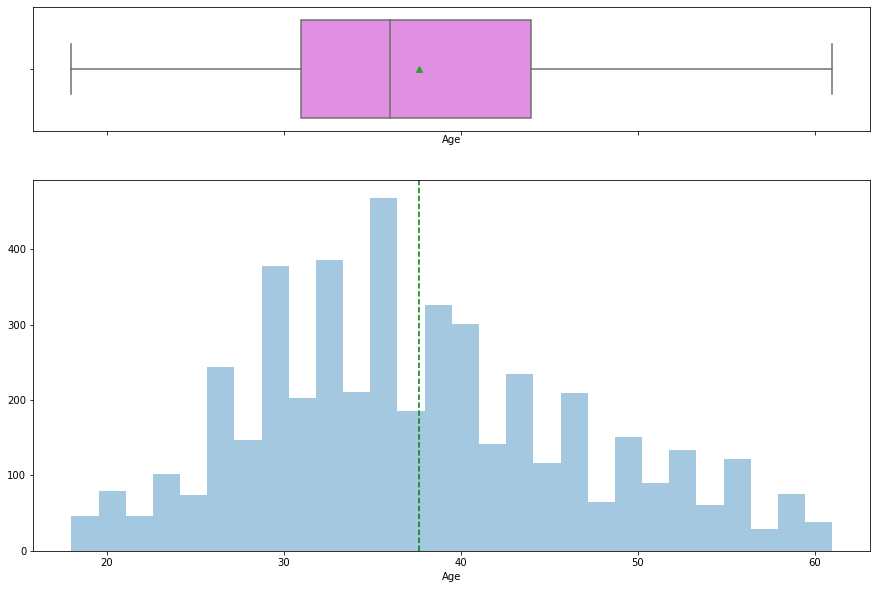

In [24]:
histogram_boxplot(df['Age'])

Age is looking normally distributed

#### Observations on PreferredLoginDevice

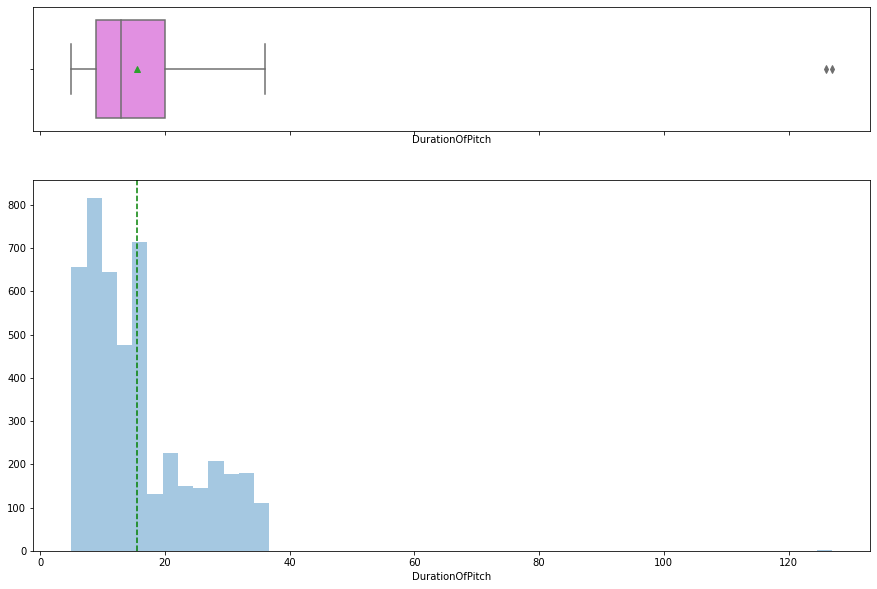

In [25]:
histogram_boxplot(df['DurationOfPitch'])

The distribution is left Skewed.We can see couple of outliers

#### Observations on MonthlyIncome

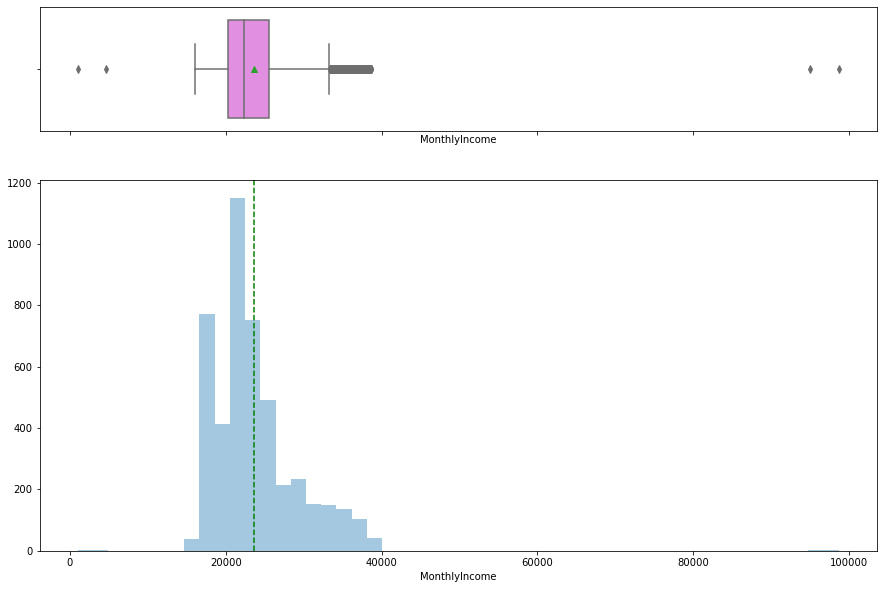

In [26]:
histogram_boxplot(df['MonthlyIncome'])

Most of the income range is less than 40000.We can see few outliers representing very few high income and low income

In [27]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

#### Observations on ProdTaken

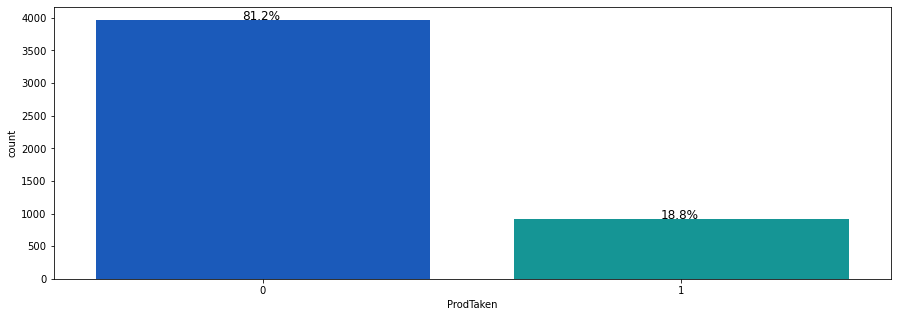

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["ProdTaken"],palette='winter')
perc_on_bar(ax,df["ProdTaken"])

Only 18.8% of customers have taken the holiday package

#### Observations on PreferredLoginDevice

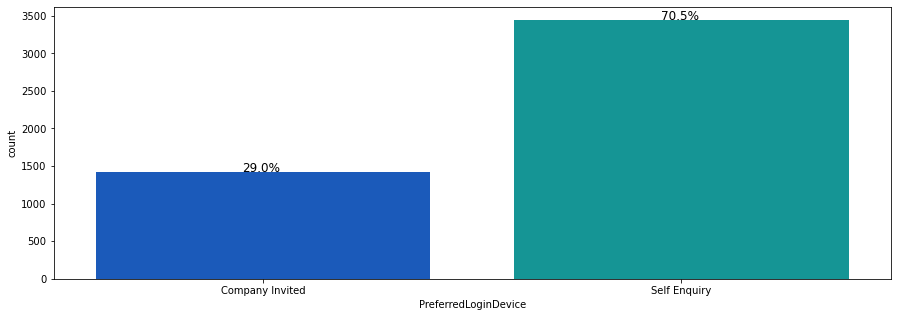

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["PreferredLoginDevice"],palette='winter')
perc_on_bar(ax,df["PreferredLoginDevice"])

70.5% of the customers had done a self enquiry rather than company invited

#### Observations on CityTier

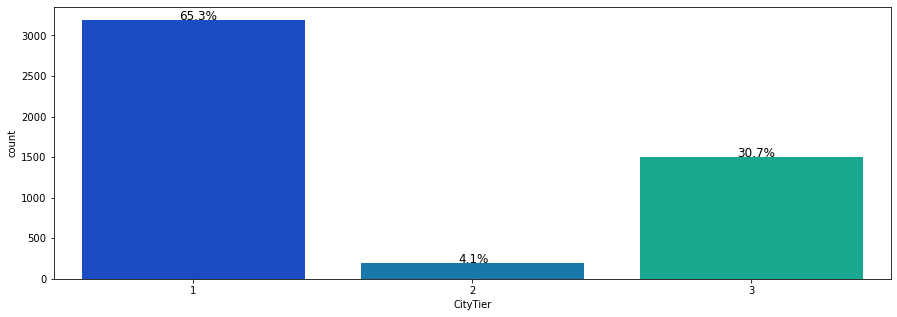

In [30]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["CityTier"],palette='winter')
perc_on_bar(ax,df["CityTier"])

Most of the customers are from city tier 1 followed by 3 and very small percentage is from tier 2

#### Observations on Occupation

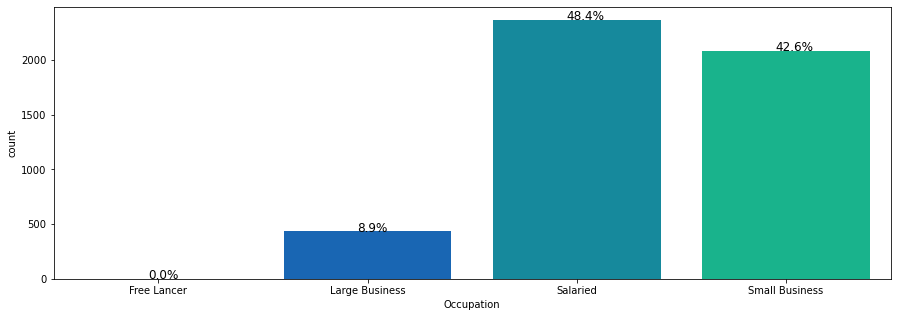

In [31]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Occupation"],palette='winter')
perc_on_bar(ax,df["Occupation"])

Majority of the customers are Salaried.About 42% are small business owners and about 9% are Large business owners.We can see few outliers for Free Lancer

#### Observations on Gender

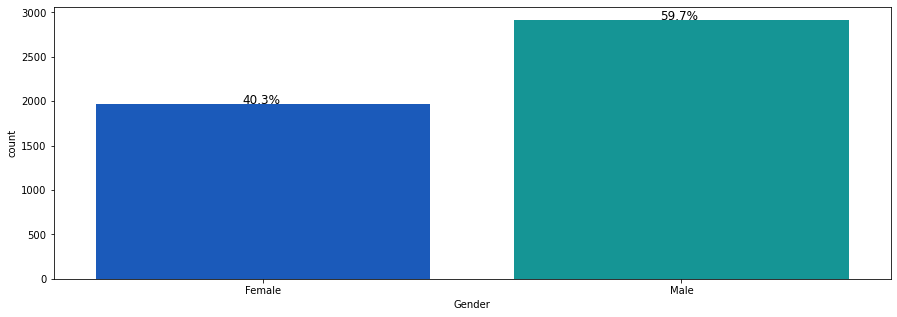

In [32]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Gender"],palette='winter')
perc_on_bar(ax,df["Gender"])

About 60% of customers are male and 40% are Females

#### Observations on NumberOfPersonVisited

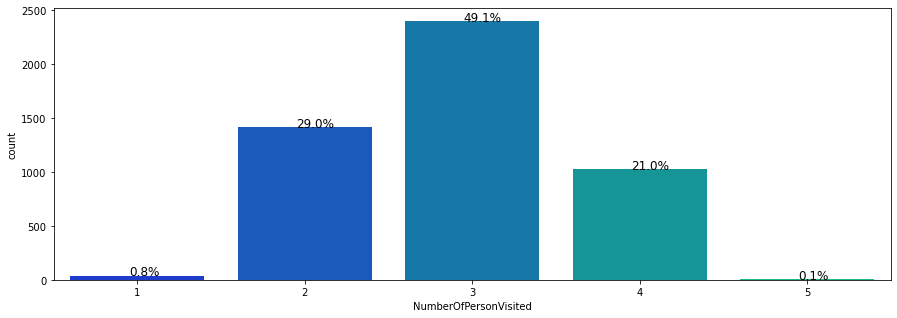

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["NumberOfPersonVisited"],palette='winter')
perc_on_bar(ax,df["NumberOfPersonVisited"])

Most of the customers had 3 people come with them for visiting 

#### Observations on PreferredPropertyStar

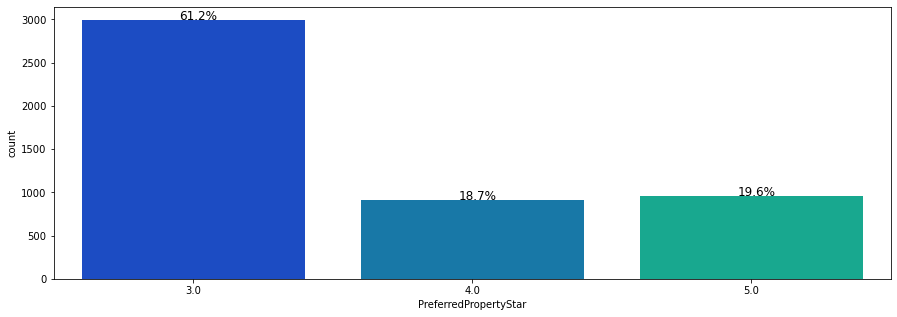

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["PreferredPropertyStar"],palette='winter')
perc_on_bar(ax,df["PreferredPropertyStar"])

Most of the customers prefer a 3 star property

#### Observations on MaritalStatus

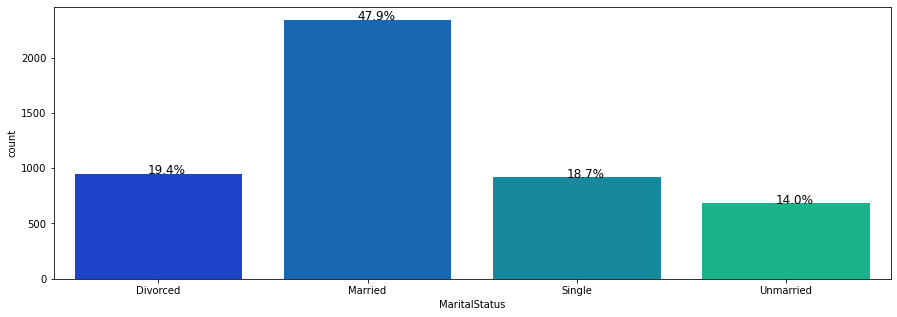

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["MaritalStatus"],palette='winter')
perc_on_bar(ax,df["MaritalStatus"])

Majority of the customers are married followed by Divorsed and Single people

#### Observations on NumberOfTrips

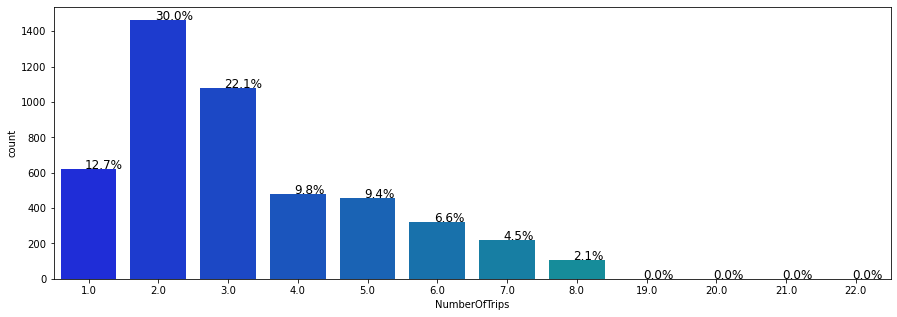

In [36]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["NumberOfTrips"],palette='winter')
perc_on_bar(ax,df["NumberOfTrips"])

Most of the customers take 2 trips per year

#### Observations on Passport

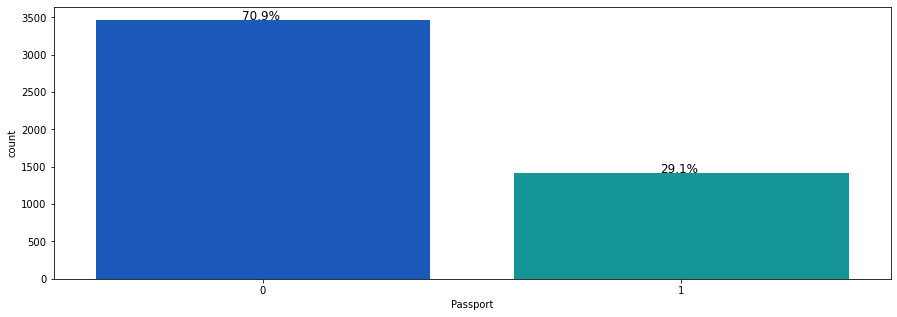

In [37]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Passport"],palette='winter')
perc_on_bar(ax,df["Passport"])

Most of the customers have donot have a Passport

#### Observations on OwnCar

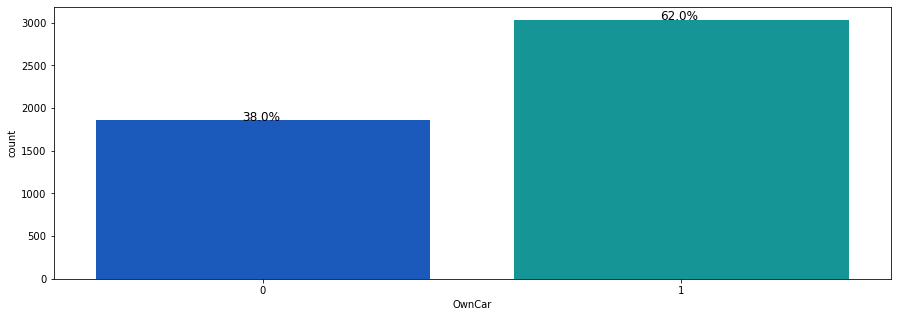

In [38]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["OwnCar"],palette='winter')
perc_on_bar(ax,df["OwnCar"])

Most of the customers are owners of a car

#### Observations on NumberOfChildrenVisited

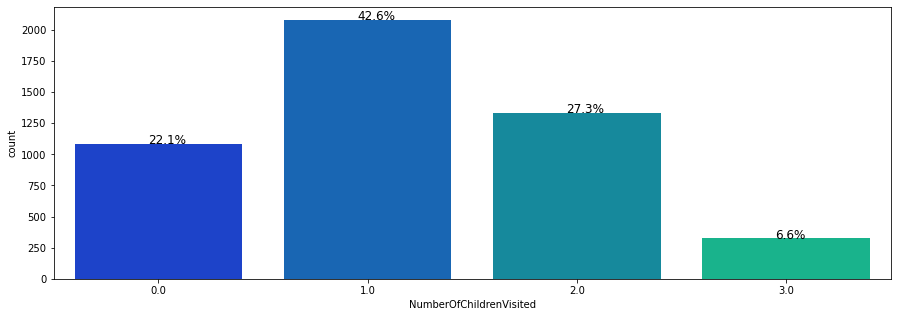

In [39]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["NumberOfChildrenVisited"],palette='winter')
perc_on_bar(ax,df["NumberOfChildrenVisited"])

Most of the customers had only one child visit with them

#### Observations on Designation

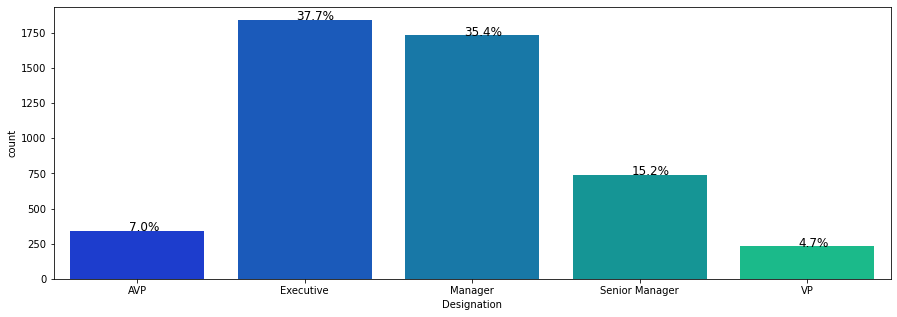

In [40]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Designation"],palette='winter')
perc_on_bar(ax,df["Designation"])

Majority of customers are Executives followed by Managers and Senior Managers

#### Observations on PitchSatisfactionScore

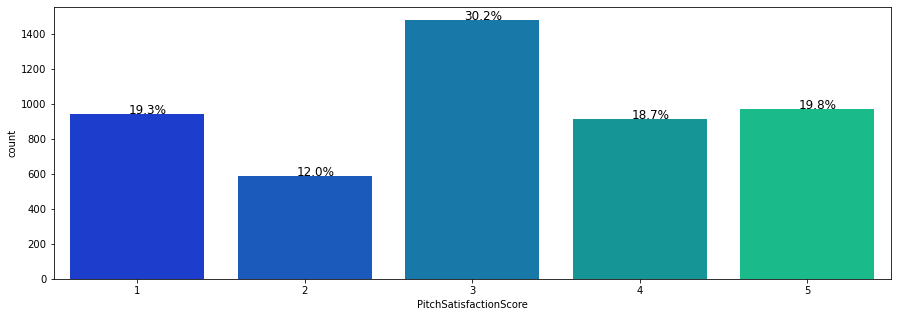

In [41]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["PitchSatisfactionScore"],palette='winter')
perc_on_bar(ax,df["PitchSatisfactionScore"])

Most of the Pitch Satisfaction score indicate a score of 3

#### Observations on ProductPitched

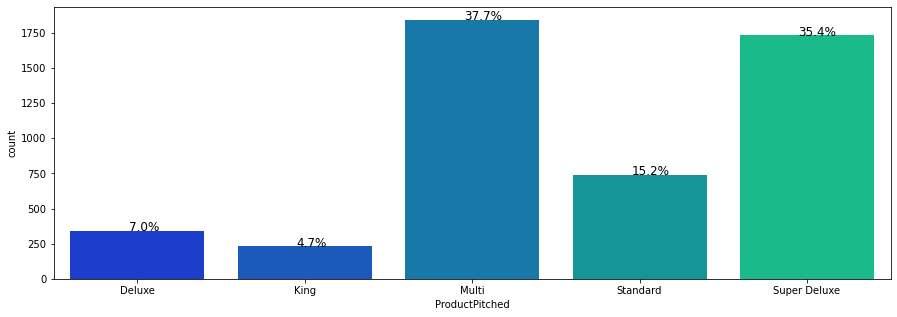

In [42]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["ProductPitched"],palette='winter')
perc_on_bar(ax,df["ProductPitched"])

Multi has been the most pitched product followed by Super Deluxe

#### Observations on NumberOfFollowups

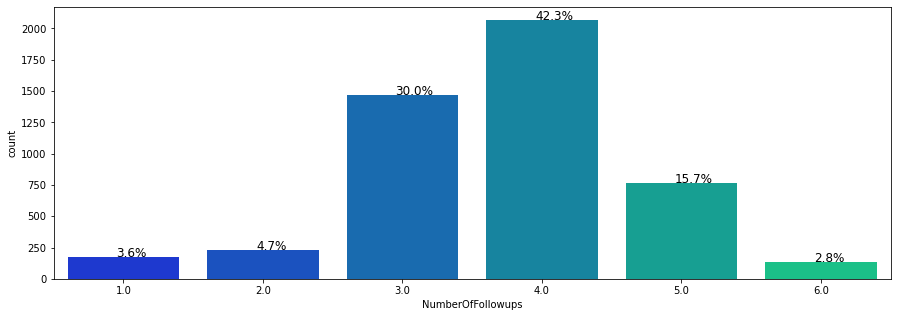

In [43]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["NumberOfFollowups"],palette='winter')
perc_on_bar(ax,df["NumberOfFollowups"])

4 has been the most number of followups made having percentage of 42.3%

### Bivariate Analysis

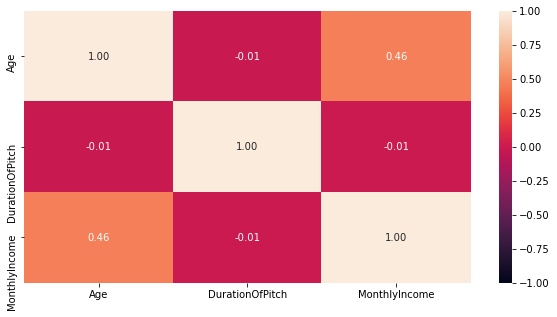

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

We see Age is correlated with Monthly Income which is expected

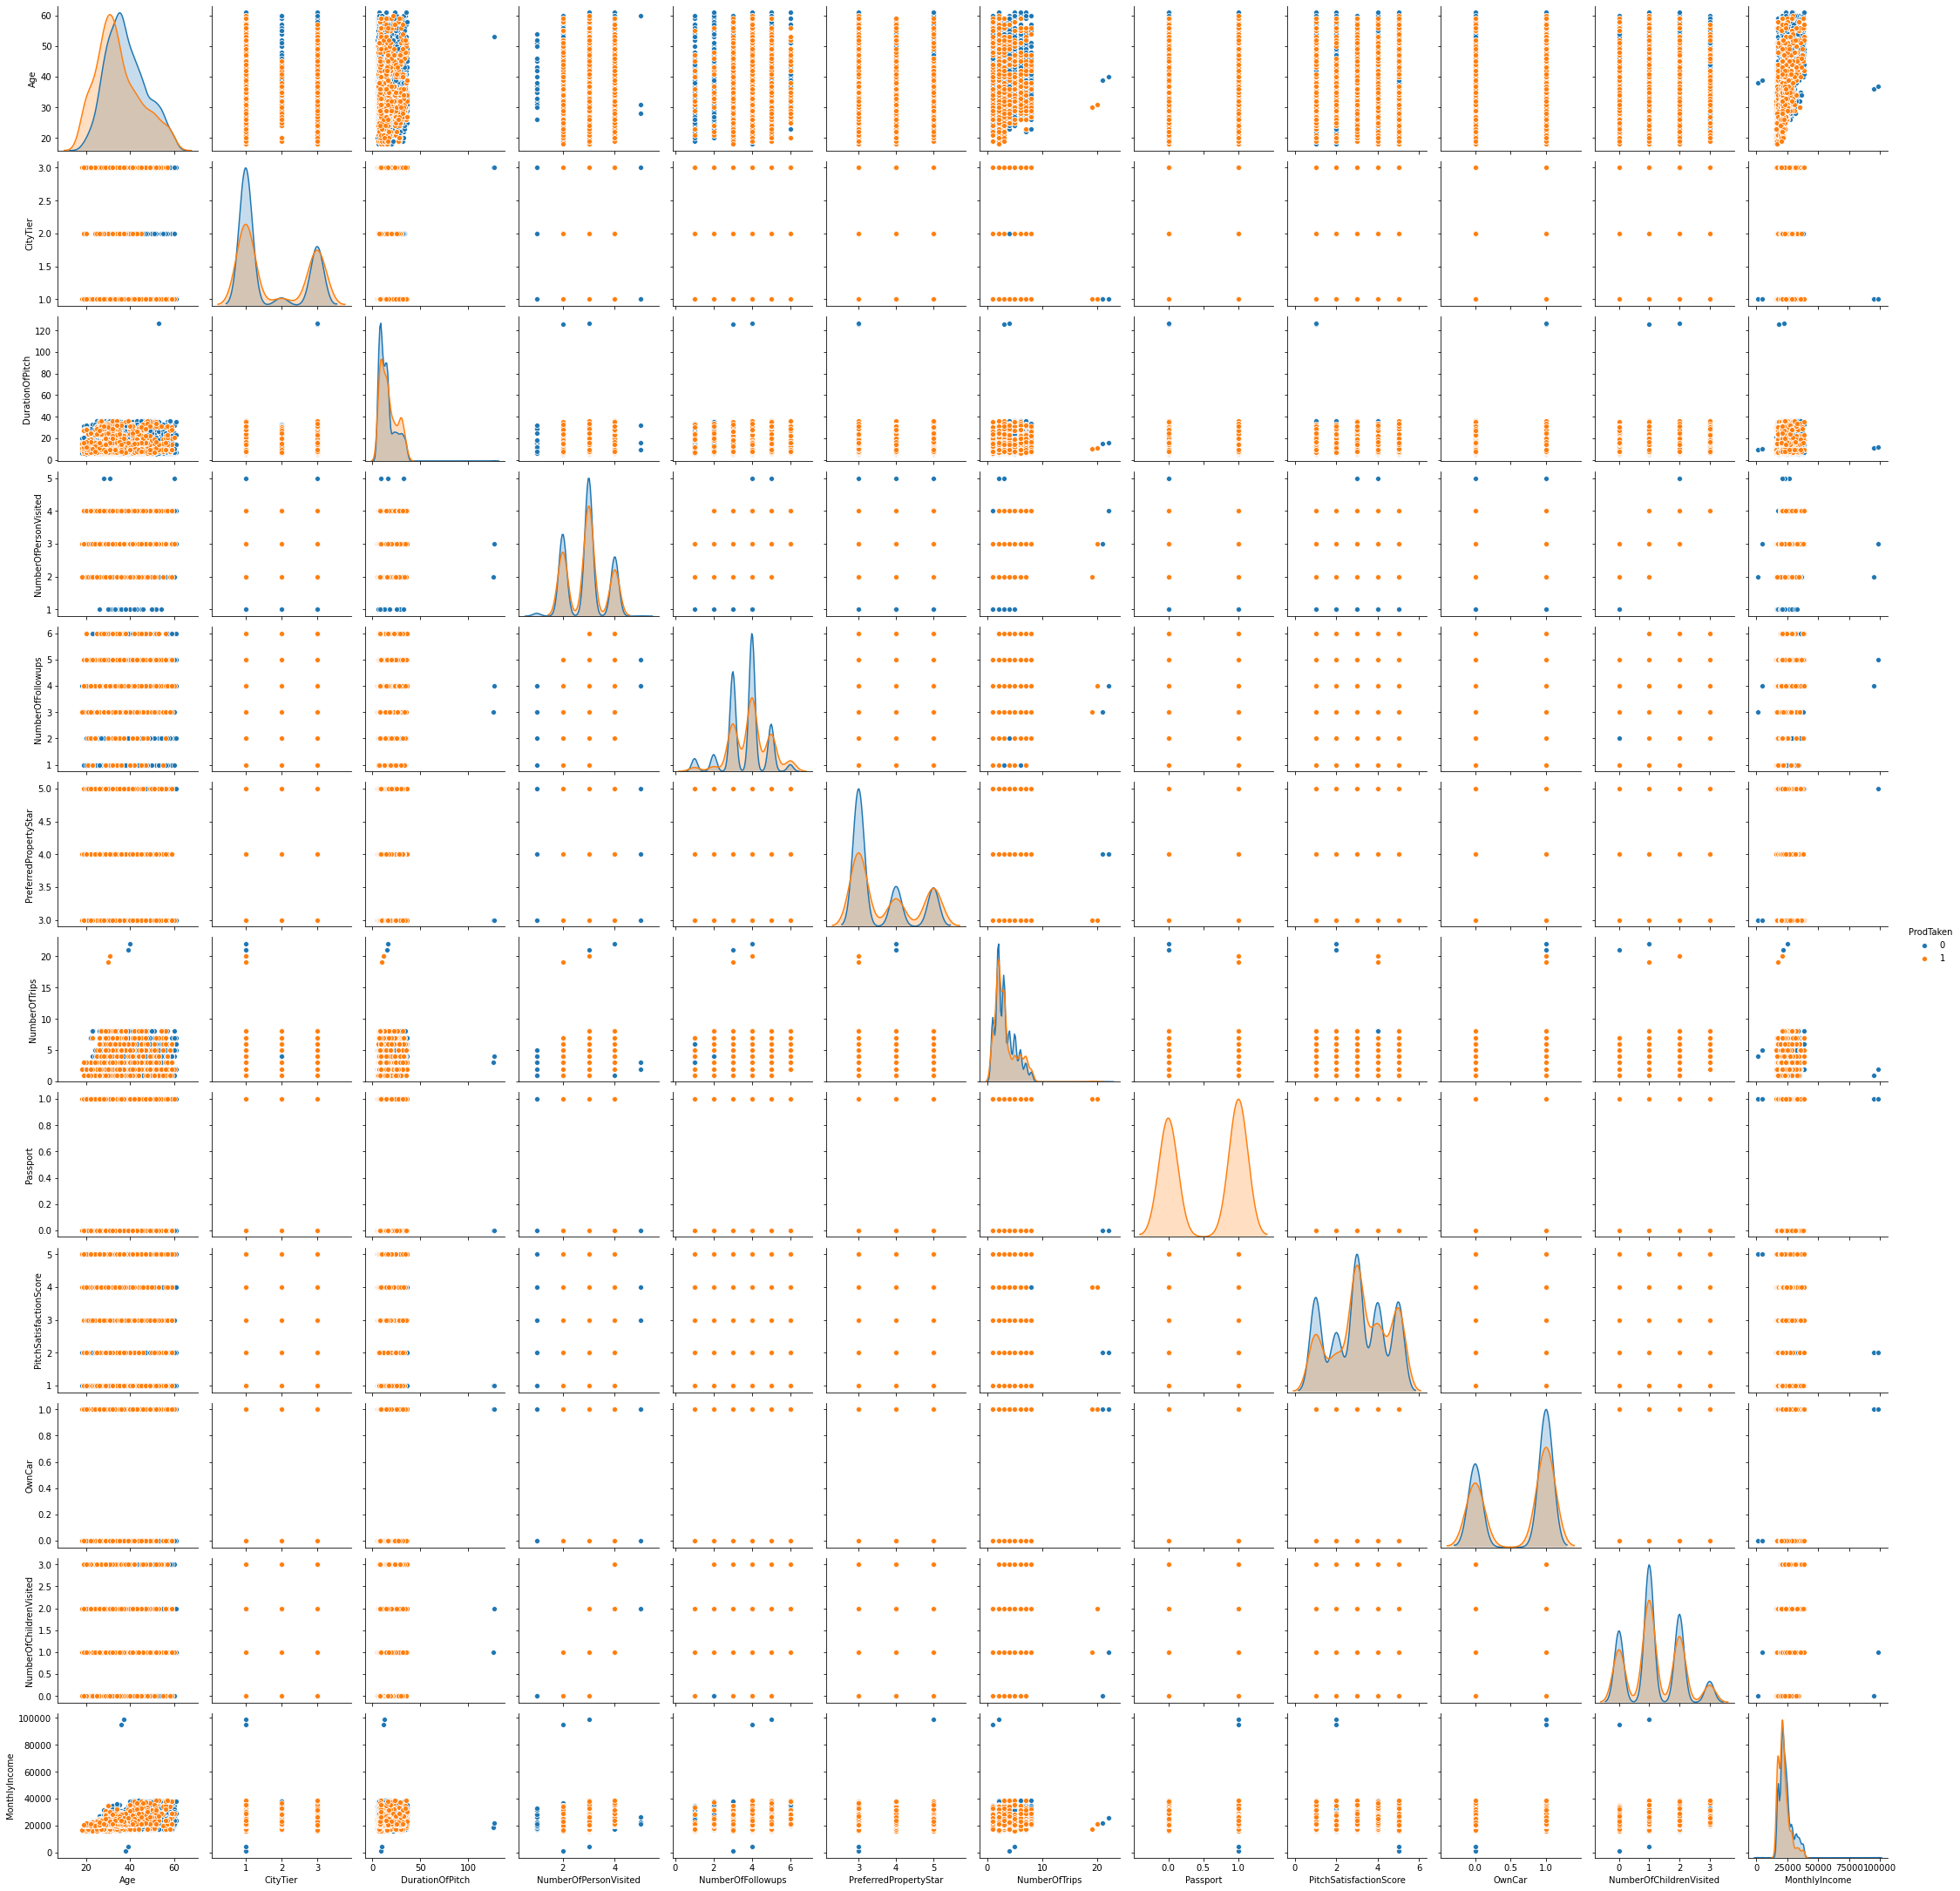

In [45]:
sns.pairplot(df,hue='ProdTaken')
plt.show()

We can see varying distributions in variables for ProdTaken, we should investigate it further.

### Bivariate Analysis of ProdTaken with continuous variables

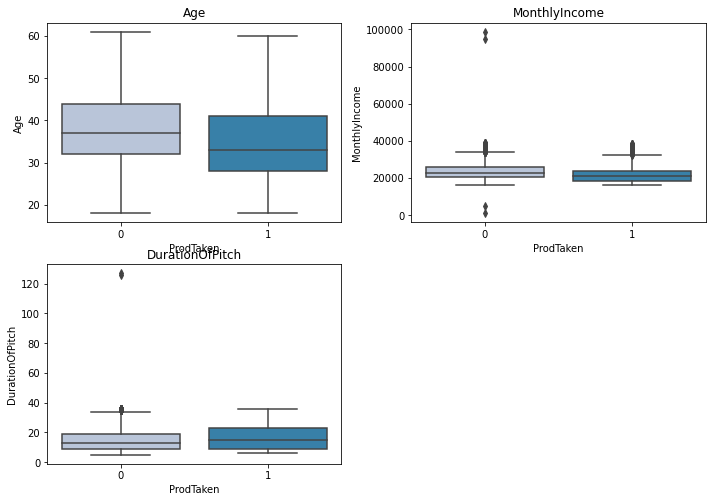

In [46]:
cols = df[['Age','MonthlyIncome','DurationOfPitch']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* We can see that the holiday package has been taken mostly by customers who are of less than 40 years of age
* We can see there is not much difference in the monthly income of customers who have and have not taken the package 
* We have see that package has been taken when thers is higher duration of pitch by salesman to the customer 

### Bivariate Analysis of ProdTaken with categorical variables

In [47]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken                0    1   All
PreferredLoginDevice                 
Company Invited       1109  310  1419
Self Enquiry          2837  607  3444
All                   3946  917  4863
------------------------------------------------------------------------------------------------------------------------


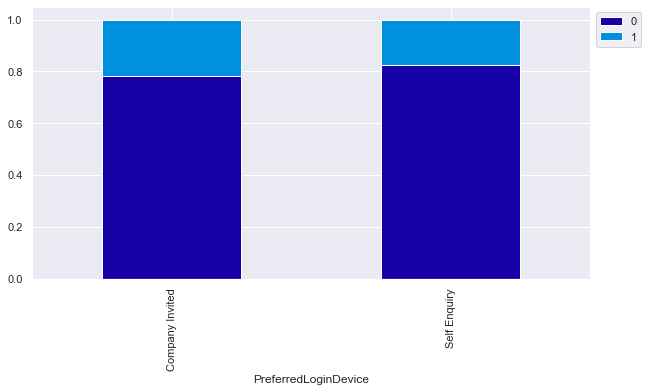

In [48]:
stacked_plot(df['PreferredLoginDevice'])

We can see that the customers who took the travel package was those who came into company's contact as company invited

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


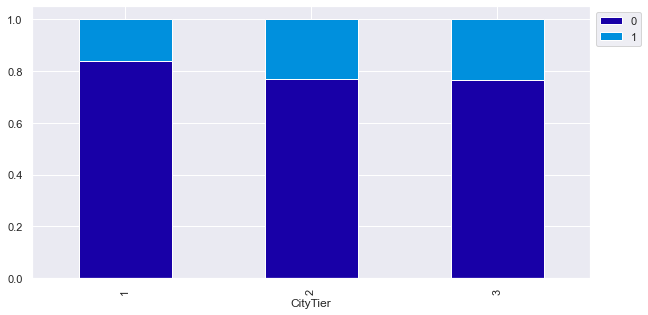

In [49]:
stacked_plot(df['CityTier'])

Those from city tier 2 and 3 have mostly purchased the travel package

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


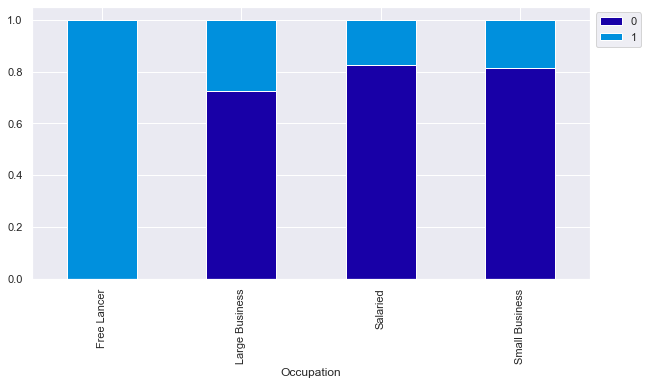

In [50]:
stacked_plot(df['Occupation'])

We can see that all of the customers who are Free Lancers(though we have only 2 such customers in this dataset) have purchased the product.Also those with Large Business have purchased the product

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


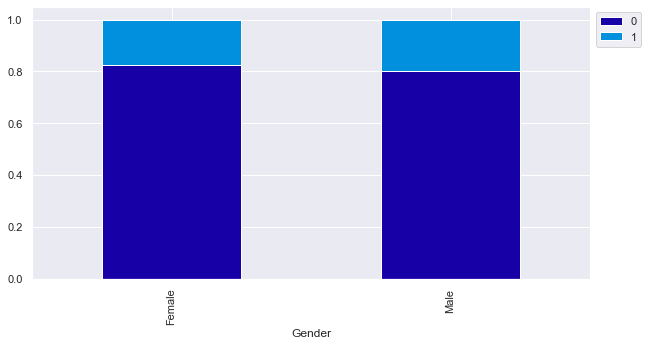

In [51]:
stacked_plot(df['Gender'])

There is not much distinction among Male and Female customers who have purchased the travel package

ProdTaken                 0    1   All
NumberOfPersonVisited                 
1                        39    0    39
2                      1151  267  1418
3                      1942  460  2402
4                       833  193  1026
5                         3    0     3
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


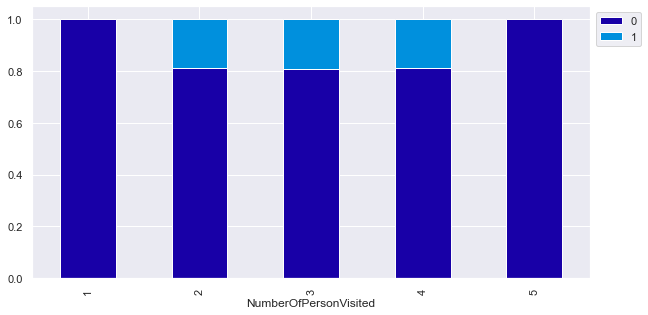

In [52]:
stacked_plot(df['NumberOfPersonVisited'])

* We can see that those with 2,3,4 persons travelling with the customer has more chance of buying the travel package
* Those with 1 and 5 persons travelling with customer didnot buy any travel package

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


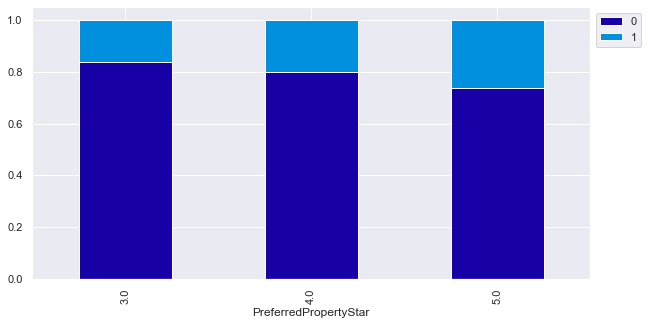

In [53]:
stacked_plot(df['PreferredPropertyStar'])

Those who prefer 5 star rated property has brought the travel package more followed by 4 and 3 star preferred customers

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


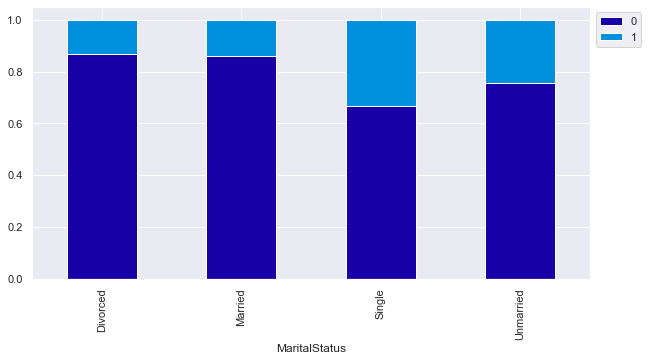

In [54]:
stacked_plot(df['MaritalStatus'])

Those who are single  and unmarried people has purchased the travel package more than married or divorced

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1165  299  1464
3.0             862  217  1079
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3840  908  4748
------------------------------------------------------------------------------------------------------------------------


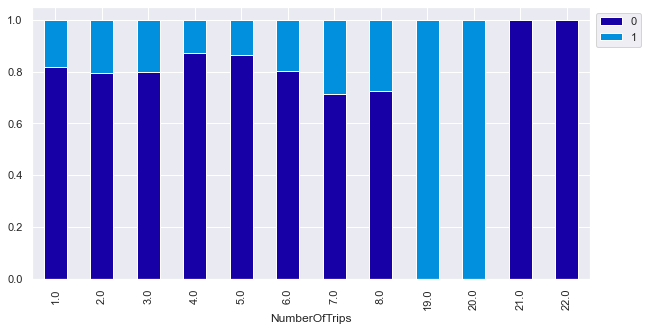

In [55]:
stacked_plot(df['NumberOfTrips'])

Those who travel 7 or 8 trips per year has more chace of purchasing the travel package.Also those those travel 2 or times per year has about 20% chance of purchasing the package


ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


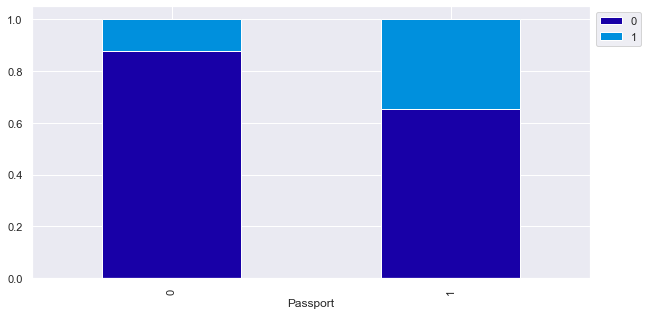

In [56]:
stacked_plot(df['Passport'])

Those who have a passport have higher chance of purchasing the travel package than those without one

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


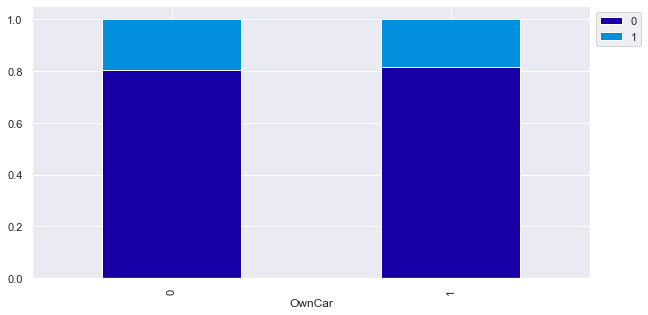

In [57]:
stacked_plot(df['OwnCar'])

There is not much difference in purchasing travel package between customers with and without a car

ProdTaken                   0    1   All
NumberOfChildrenVisited                 
0.0                       880  202  1082
1.0                      1688  392  2080
2.0                      1082  253  1335
3.0                       259   66   325
All                      3909  913  4822
------------------------------------------------------------------------------------------------------------------------


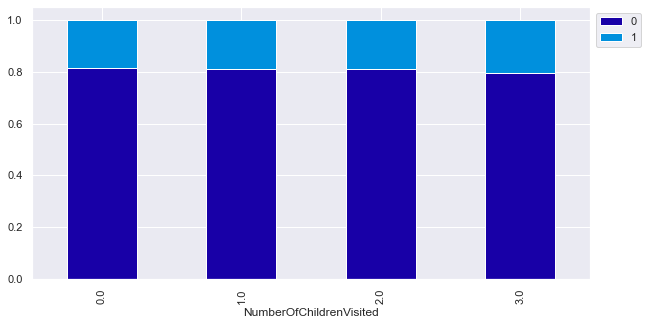

In [58]:
stacked_plot(df['NumberOfChildrenVisited'])

There is no difference in the purchasing travel package for customers who had 0,1,2,3 children visiting with them

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


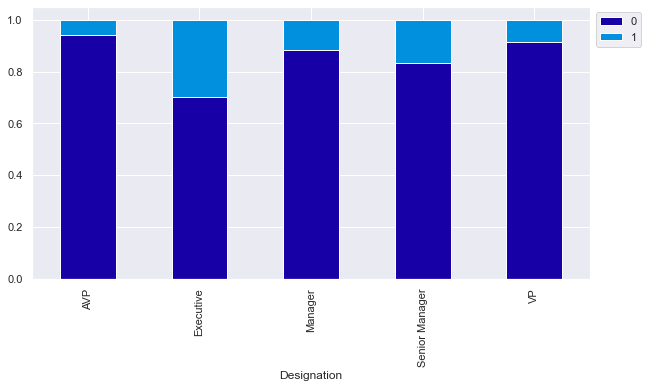

In [59]:
stacked_plot(df['Designation'])

Those who are in executive positions have purchased the travel package more followed by those in senior manager position

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


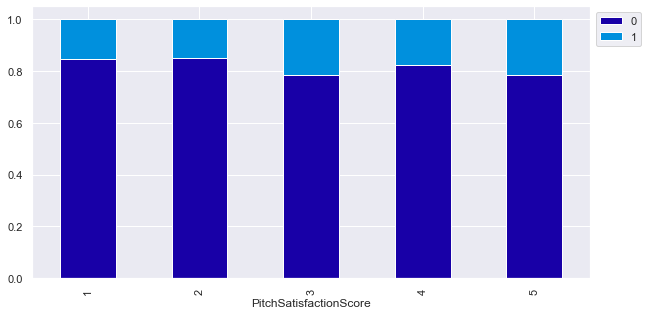

In [60]:
stacked_plot(df['PitchSatisfactionScore'])

Those customers who have given a PitchSatisfactionScore of 3 or 5 have purchased the travel package more

ProdTaken          0    1   All
ProductPitched                 
Deluxe           322   20   342
King             210   20   230
Multi           1290  552  1842
Standard         618  124   742
Super Deluxe    1528  204  1732
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


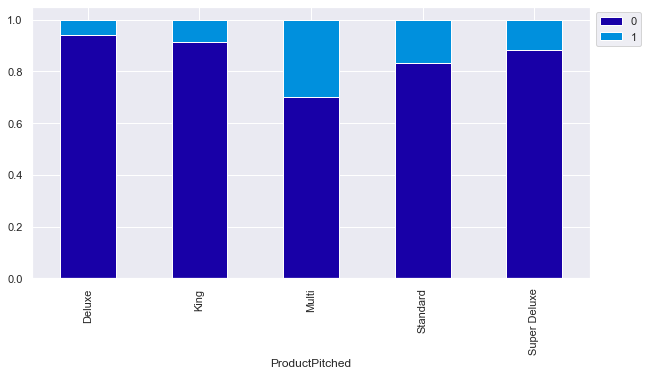

In [61]:
stacked_plot(df['ProductPitched'])

The package was purchased by those customers to whom the Multi product was pitched, followed by standard product

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1689  379  2068
5.0                 577  191   768
6.0                  82   54   136
All                3931  912  4843
------------------------------------------------------------------------------------------------------------------------


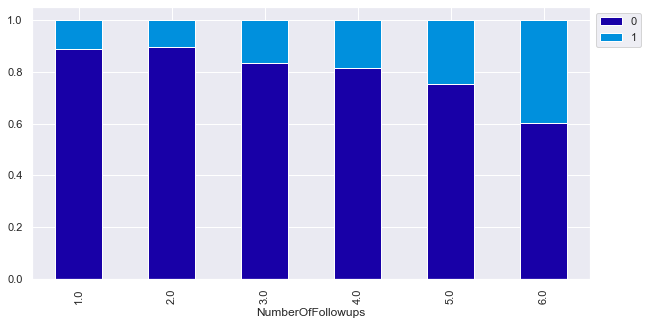

In [62]:
stacked_plot(df['NumberOfFollowups'])

The chance of purchasing increased as the number of followups went up with number of followups of 6 showing good chance of the customer purchasing the package

## <a id = "link3"></a> Insights based on EDA

* We can see that the holiday package has been taken mostly by customers who are of less than 40 years of age,are in executive positions
* Customers who purchased travel package preferred 5 star rated properties and were mostly from city tier 2,3.Also they were mostly who came into the company's contact as company invited
* In terms of occupation FreeLancers and Large Business owners have higher chance of purchasing the travel package
* Also single and unmarried people has higher chance of purchasing the travel package.Also customers having 2,3,4 persons travelling with them has more chance of buying the travel package
* Those who travel 7 or 8 trips per year has more chace of purchasing the travel package.Also having a passport showed chances of purchasing the package
* Factors that didnot have much effect on travel package purchase was Gender,number of children visiting, having a car etc.

In terms of customer interaction data customers mostly purchased the travel package when

* When there is higher duration of pitch by salesman to the customer
* When the PitchSatisfactionScore was 3 or 5 
* When the product pitched was Multi ,followed by standard product
* When the number of followups was high, with number of followups of 6 showing good chance of the customer purchasing the package

## <a id = "link4"></a> Missing value Detection and Treatment

#### Checking missing values in Dataset

In [63]:
df.isnull().sum()

ProdTaken                    0
Age                        226
PreferredLoginDevice        25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

We can see that we have missing values for the columns Age,PreferredLoginDevice,Duration of pitch,Number of trips,Children visited
and Monthly Income columns

#### Missing Value Treatment

In [64]:
#Look at few rows where Age is missing
df[df["Age"].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Super Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Multi,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Super Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Super Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Multi,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2413,1,NaN,Self Enquiry,3,21.0,Small Business,Male,2,5.0,Super Deluxe,3.0,Married,7.0,1,1,0,1.0,Manager,18423.0
2427,1,NaN,Self Enquiry,3,22.0,Small Business,Male,3,3.0,Standard,3.0,Married,3.0,0,5,0,1.0,Senior Manager,18544.0
2430,1,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Multi,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


In [65]:
# We'll impute these missing values one by one, by taking median Age for Males and Females,
# using the Designation
df.groupby(["Designation", "Gender"], as_index=False)["Age"].median()

,Designation,Gender,Age
0,AVP,Female,48.0
1,AVP,Male,49.0
2,Executive,Female,32.0
3,Executive,Male,32.0
4,Manager,Female,37.0
5,Manager,Male,36.0
6,Senior Manager,Female,38.0
7,Senior Manager,Male,39.0
8,VP,Female,50.0
9,VP,Male,47.0


In [66]:
# Impute missing Age with median value
df["Age"] = df.groupby(["Designation", "Gender"])["Age"].transform(
    lambda x: x.fillna(x.median())
)

In [67]:
#check if any missing Age after treament
df[df["Age"].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [68]:
#Check few rows where Preferred Login Device is missing
df[df['PreferredLoginDevice'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Super Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Multi,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Super Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Super Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Multi,5.0,Single,2.0,0,2,1,1.0,Executive,NaN
598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Multi,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Super Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Super Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Multi,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Multi,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN


In [69]:
#We will impute the missing value for PreferredLogin Device using the mode(highest occuring value) of the feature
df['PreferredLoginDevice'].mode()

0    Self Enquiry
Name: PreferredLoginDevice, dtype: category
Categories (2, object): [Company Invited, Self Enquiry]

In [70]:
# Impute missing PreferredLoginDevice with value Self Enquiry
df['PreferredLoginDevice']=df['PreferredLoginDevice'].fillna('Self Enquiry')

In [71]:
#check if any missing PreferredLoginDevice after imputing
df[df['PreferredLoginDevice'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [72]:
#Check at few rows where Preferred Login Device is missing
df[df['DurationOfPitch'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
46,0,34.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Super Deluxe,3.0,Single,1.0,0,5,1,1.0,Manager,19568.0
75,0,31.0,Self Enquiry,1,NaN,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,2.0,0,5,0,1.0,Manager,NaN
76,0,35.0,Self Enquiry,3,NaN,Small Business,Male,2,4.0,Super Deluxe,5.0,Single,1.0,0,2,0,1.0,Manager,NaN
84,0,34.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Super Deluxe,4.0,Divorced,2.0,0,5,0,0.0,Manager,NaN
103,0,34.0,Self Enquiry,1,NaN,Salaried,Female,2,3.0,Super Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,19809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,0,19.0,Self Enquiry,3,NaN,Small Business,Female,4,5.0,Multi,3.0,Single,3.0,0,1,0,3.0,Executive,19878.0
4427,1,21.0,Self Enquiry,1,NaN,Small Business,Male,3,4.0,Multi,3.0,Single,3.0,1,5,1,2.0,Executive,19687.0
4641,0,19.0,Company Invited,1,NaN,Salaried,Male,4,4.0,Multi,3.0,Single,3.0,0,1,0,2.0,Executive,19729.0
4678,0,29.0,Self Enquiry,3,NaN,Small Business,Male,4,4.0,Multi,4.0,Married,3.0,0,5,0,3.0,Executive,19730.0


In [73]:
#We will impute the missing value for DurationOfPitch using the median value 
df['DurationOfPitch'].median()

13.0

In [74]:
# Impute missing Duration of Pitch with median value
df['DurationOfPitch']=df['DurationOfPitch'].fillna(13)

In [75]:
#check if any missing DurationOfPitch after imputing
df[df['DurationOfPitch'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [76]:
#Check at few rows where NumberOfFollowups is missing
df[df['NumberOfFollowups'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
79,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Super Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
94,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Super Deluxe,3.0,Single,2.0,0,5,1,0.0,Manager,20010.0
96,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Super Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Multi,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Super Deluxe,4.0,Married,7.0,0,4,1,1.0,Manager,19941.0
174,0,45.0,Self Enquiry,3,10.0,Salaried,Female,1,NaN,Super Deluxe,5.0,Married,5.0,1,4,0,0.0,Manager,20006.0
317,1,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Super Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0
322,0,32.0,Self Enquiry,1,8.0,Small Business,Female,3,NaN,Super Deluxe,3.0,Single,1.0,0,3,1,2.0,Manager,20055.0
376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Super Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
532,0,47.0,Self Enquiry,3,20.0,Small Business,Male,2,NaN,Super Deluxe,5.0,Single,3.0,0,2,0,1.0,Manager,19960.0


In [77]:
#We will impute the missing value for NumberOfFollowups using the mode value 
df['NumberOfFollowups'].mode()

0    4.0
Name: NumberOfFollowups, dtype: category
Categories (6, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [78]:
# Impute missing NumberOfFollowups with mode value
df['NumberOfFollowups']=df['NumberOfFollowups'].fillna(4)

In [79]:
#check if any missing NumberOfFollowupsafter imputing
df[df['NumberOfFollowups'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [80]:
#Check at few rows where PreferredPropertyStar is missing
df[df['PreferredPropertyStar'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Multi,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


In [81]:
#We will impute the missing value for PreferredPropertyStar using the mode value 
df['PreferredPropertyStar'].mode()

0    3.0
Name: PreferredPropertyStar, dtype: category
Categories (3, float64): [3.0, 4.0, 5.0]

In [82]:
# Impute missing PreferredPropertyStar with mode value
df['PreferredPropertyStar']=df['PreferredPropertyStar'].fillna(3)

In [83]:
#Check after imputing
df[df['PreferredPropertyStar'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [84]:
#Check at few rows where NumberOfTrips is missing
df[df['NumberOfTrips'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
2469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,NaN,0,5,0,2.0,VP,37772.0
2473,0,47.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,NaN,0,2,0,2.0,VP,37625.0
2506,0,51.0,Self Enquiry,1,14.0,Small Business,Female,3,5.0,King,3.0,Married,NaN,1,4,1,2.0,VP,37418.0
2549,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Divorced,NaN,0,2,1,2.0,VP,37522.0
2550,0,51.0,Company Invited,1,7.0,Salaried,Female,4,4.0,King,4.0,Divorced,NaN,1,2,0,3.0,VP,36850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,1,45.0,Self Enquiry,3,16.0,Salaried,Male,4,5.0,Multi,5.0,Married,NaN,0,1,1,3.0,Executive,37868.0
4850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Super Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Multi,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Multi,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0


In [85]:
#We will impute the missing value for NumberOfTrips using the mode value 
df['NumberOfTrips'].mode()

0    2.0
Name: NumberOfTrips, dtype: category
Categories (12, float64): [1.0, 2.0, 3.0, 4.0, ..., 19.0, 20.0, 21.0, 22.0]

In [86]:
# Impute missing NumberOfTrips with mode value
df['NumberOfTrips']=df['NumberOfTrips'].fillna(2)

In [87]:
#check missing values after imputing
df[df['NumberOfTrips'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [88]:
#Check at few rows where NumberOfTrips is missing
df[df['NumberOfChildrenVisited'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
165,0,50.0,Self Enquiry,1,17.0,Salaried,Female,2,3.0,King,4.0,Single,4.0,0,5,1,NaN,VP,34926.0
190,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,3.0,Divorced,1.0,0,2,1,NaN,VP,34999.0
568,1,55.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,King,5.0,Divorced,6.0,1,2,1,NaN,VP,34859.0
746,0,41.0,Company Invited,1,13.0,Salaried,Female,2,5.0,King,3.0,Married,2.0,0,4,1,NaN,VP,34973.0
749,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Divorced,2.0,0,3,1,NaN,VP,34845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,0,53.0,Self Enquiry,3,10.0,Small Business,Male,3,5.0,Deluxe,5.0,Married,3.0,0,5,1,NaN,AVP,35534.0
4506,0,48.0,Self Enquiry,1,9.0,Salaried,Female,3,4.0,Deluxe,3.0,Married,3.0,1,4,1,NaN,AVP,35430.0
4530,0,52.0,Self Enquiry,3,33.0,Small Business,Female,4,4.0,Deluxe,3.0,Married,4.0,0,3,1,NaN,AVP,34985.0
4688,0,56.0,Company Invited,1,9.0,Small Business,Male,3,5.0,Deluxe,5.0,Single,2.0,0,3,1,NaN,AVP,35434.0


From the data looks like mostly children visited is missing because no children accompanied these customers so we will fill the missing values with 0



In [89]:
# Impute missing NumberOfChildrenVisited with 0
df['NumberOfChildrenVisited']=df['NumberOfChildrenVisited'].fillna(0)

In [90]:

#checking missingness after imputing
df[df['NumberOfChildrenVisited'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [91]:
df[df['MonthlyIncome'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
11,0,37.0,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Super Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,32.0,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Multi,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,37.0,Company Invited,1,17.0,Salaried,Female,3,2.0,Super Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
26,1,32.0,Company Invited,1,22.0,Salaried,Female,3,5.0,Multi,5.0,Single,2.0,1,4,1,2.0,Executive,NaN
44,0,37.0,Company Invited,1,6.0,Small Business,Female,2,3.0,Super Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,1,34.0,Company Invited,3,13.0,Salaried,Female,2,5.0,Multi,3.0,Single,2.0,0,3,0,1.0,Executive,NaN
2399,1,37.0,Company Invited,3,19.0,Large Business,Female,2,3.0,Super Deluxe,4.0,Single,6.0,0,3,1,0.0,Manager,NaN
2410,1,32.0,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Multi,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2430,1,32.0,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Multi,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


In [92]:
#MonthlyIncome 
df.groupby(["Occupation"], as_index=False)["MonthlyIncome"].median()

,Occupation,MonthlyIncome
0,Free Lancer,18929.0
1,Large Business,21866.0
2,Salaried,22130.0
3,Small Business,22689.0


In [93]:
# Impute missing Monthly Income
df["MonthlyIncome"] = df.groupby(["Occupation"])["MonthlyIncome"].transform(
    lambda x: x.fillna(x.median())
)

In [94]:
df[df['MonthlyIncome'].isnull()]

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [95]:
df.isnull().sum()# checking if any more missing values

ProdTaken                  0
Age                        0
PreferredLoginDevice       0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

There are no missing values in our dataset now

## <a id = "link5"></a> Outlier Detection

### Outlier detection for numerical columns

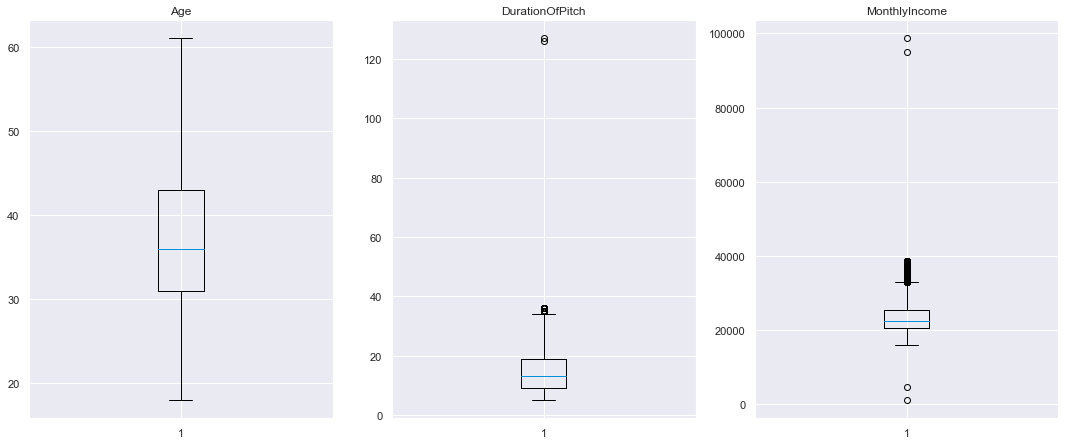

In [96]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(['Age','DurationOfPitch','MonthlyIncome']):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [97]:
# Check DurationOfPitch extreme values
df.sort_values(by=["DurationOfPitch"],ascending = False).head(5)

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Multi,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0
1434,0,32.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Multi,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3718,0,32.0,Self Enquiry,3,36.0,Small Business,Female,4,5.0,Super Deluxe,3.0,Married,3.0,0,3,1,1.0,Manager,24146.0
3768,0,30.0,Self Enquiry,1,36.0,Salaried,Male,4,6.0,Super Deluxe,3.0,Married,2.0,0,5,1,3.0,Manager,25062.0
4738,0,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Super Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0


We can see couple of values like 127,126 but those are possible values because the duration can get extended due to several reasons

In [98]:
# Check MonthlyIncome extreme values
df.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Multi,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Multi,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Divorced,2.0,0,2,1,2.0,VP,38677.0
4104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Married,2.0,0,1,1,3.0,VP,38677.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,3.0,Married,3.0,0,4,1,1.0,VP,38651.0


We need more information to determine if these are acutally outlier values so will leave them untreated for now

Lets us also analyse the extreme values of the variable NumberOfTrips since we saw few outliers for this during our EDA

In [99]:
# Check NumberOfTrips extreme values
df.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Super Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Super Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Multi,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Multi,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
4596,0,33.0,Company Invited,1,7.0,Salaried,Female,4,5.0,Multi,4.0,Married,8.0,0,3,0,3.0,Executive,21010.0


**We see few outlier values but based on the info we have, these could be possible values ,so we will not treat them **

## Model Building - Approach  
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## <a id = "link6"></a> Split the dataset

* Since we have a significant imbalance in the distribution of the target classes, we will use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* For that we will use the `stratify` parameter in the train_test_split function.

Since our requirement is not to use customer interaction data for modelling ,we will drop those variables from our data for modelling

In [100]:
# Separating features and the target column
X = df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['ProdTaken']

In [101]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

In [102]:
X_train.shape, X_test.shape

((3421, 38), (1467, 38))

In [103]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [104]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will purchase travel package but the customer ultimately doesnot purchase the package
2. Predicting a customer will not purchase travel package but the customer purchases the travel package

### Which case is more important? 
* Since the travel company want to reduce the marketing cost ,Predicting a customer will purchase travel package but the customer ultimately doesnot purchase the packaget is more important to the company so as to reduce the marketing cost and focus on customers who would actually buy the package

### How to reduce this loss i.e need to reduce False Positives?
* Company wants Precision to be maximized, greater the Precision higher the chances of minimizing false positives. Hence, the focus should be on increasing Precision or minimizing the false positives or in other words identifying the true positives,so that the company can focus on customers who will actually purchase the travel package and hence reduce marketing cost for the company

## <a id = "link7"></a> Model Building Decision Tree,Bagging classifier,Random Forest

#### Defining function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix

In [105]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [106]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [107]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [108]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 

* In this case, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [117]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [118]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

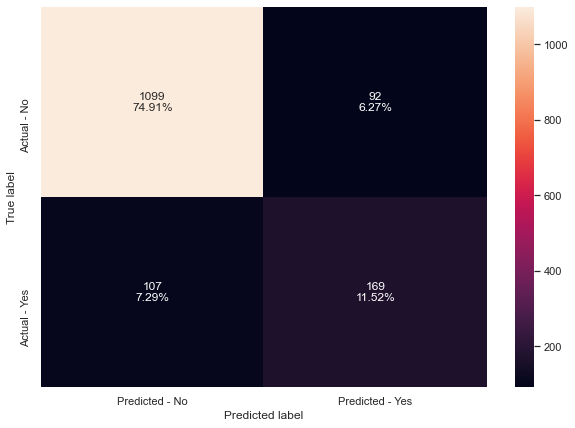

In [119]:
make_confusion_matrix(dtree,y_test)

In [120]:
dtree_acc = get_accuracy_score(dtree)
dtree_precision = get_precision_score(dtree)
dtree_recall = get_recall_score(dtree)


Accuracy on training set :  1.0
Accuracy on test set :  0.8643490115882754
Precision on training set :  1.0
Precision on test set :  0.6475095785440613
Recall on training set :  1.0
Recall on test set :  0.6123188405797102


We can see decision tree is overfitting the data and precision is not that great

### Bagging Classifier

In [121]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

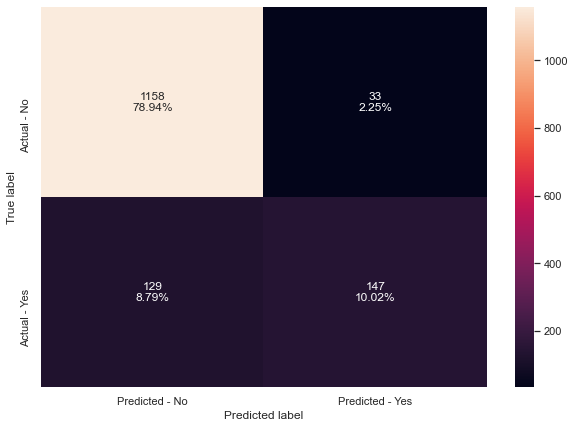

In [122]:
make_confusion_matrix(bagging,y_test)

In [123]:
bagging_acc = get_accuracy_score(bagging)
bagging_precision = get_precision_score(bagging)
bagging_recall = get_recall_score(bagging)


Accuracy on training set :  0.9900613855597779
Accuracy on test set :  0.8895705521472392
Precision on training set :  0.9935275080906149
Precision on test set :  0.8166666666666667
Recall on training set :  0.953416149068323
Recall on test set :  0.532608695652174


Precision has increased .Also accuracy and recall has increased

### Bagging Classifier with weighted decision tree

In [124]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

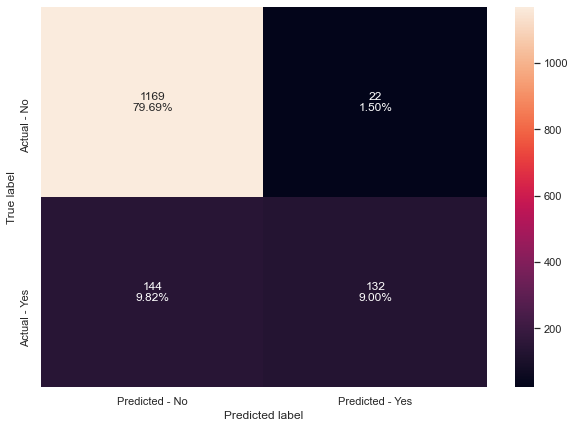

In [125]:
make_confusion_matrix(bagging_wt,y_test)

In [126]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)


Accuracy on training set :  0.9903536977491961
Accuracy on test set :  0.8868438991138378
Precision on training set :  0.9967479674796748
Precision on test set :  0.8571428571428571
Recall on training set :  0.9518633540372671
Recall on test set :  0.4782608695652174


Precision has improved and accuracy remains almost the same

### Random Forest

In [127]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

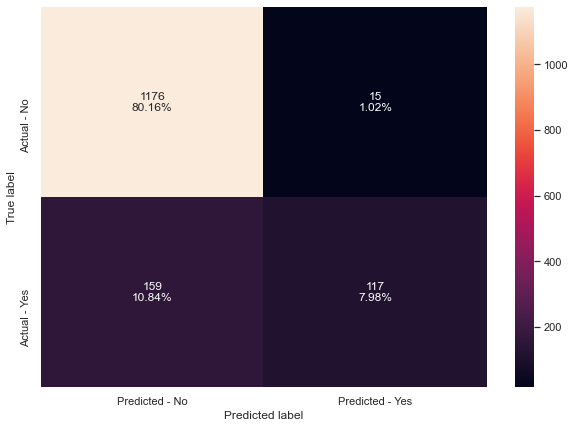

In [128]:
make_confusion_matrix(rf,y_test)

In [129]:
rf_acc = get_accuracy_score(rf)
rf_precision = get_precision_score(rf)
rf_recall = get_recall_score(rf)


Accuracy on training set :  1.0
Accuracy on test set :  0.8813905930470347
Precision on training set :  1.0
Precision on test set :  0.8863636363636364
Recall on training set :  1.0
Recall on test set :  0.42391304347826086


Precision has improved ,Recall has dropped 

### RandomForest With Class weigths

In [130]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

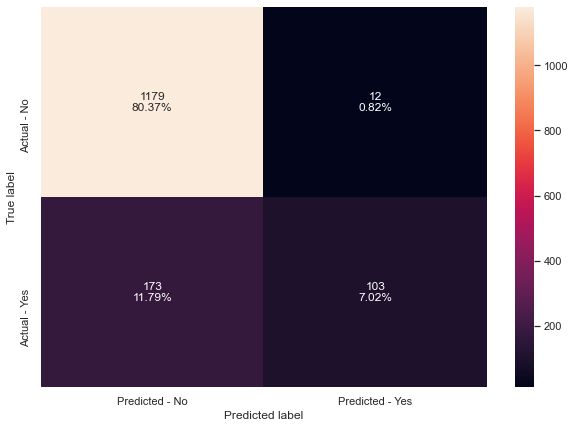

In [131]:
make_confusion_matrix(rf_wt,y_test)

In [132]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)


Accuracy on training set :  1.0
Accuracy on test set :  0.8738922972051807
Precision on training set :  1.0
Precision on test set :  0.8956521739130435
Recall on training set :  1.0
Recall on test set :  0.37318840579710144


Precision has slightly improved but there is overfitting 

## <a id = "link8"></a> Model Performance Evaluation and Improvement-Bagging

* Customer purchased package and model predicted customer will purchase travel package :  True Positive (observed=1,predicted=1)

* Customer did not purchase package and model predicted customer will purchase travel package  : False Postive (observed=0,predicted=1)

* Customer didnot purchase package and model predicted customer will not purchase travel package : True Negative (observed=0,predicted=0)

* Customer purchased package and model predicted customer will not purchase travel package  : False Negative (observed=1,predicted=0)

**Precision is the right metric for our case**.Company wants Precision to be maximized, greater the Precision higher the chances of minimizing false positives. Hence, the focus should be on increasing Precision or minimizing the false positives or in other words identifying the true positives,so that the company can focus on customers who will actually purchase the travel package and hence reduce marketing cost for the company

### Lets see if we can improve model performance further by tuning the Models

### Model Tuning using Grid Search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

#### Tuning Decision Tree

In [133]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

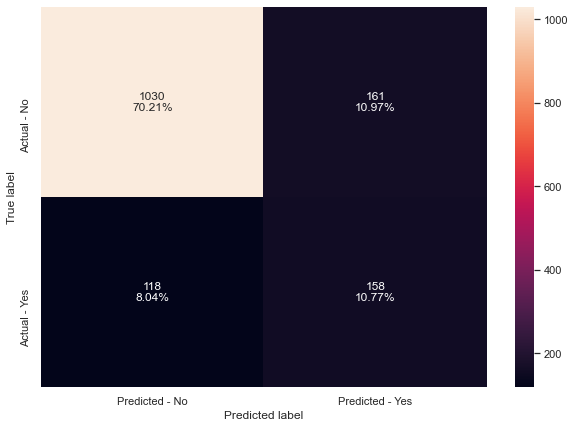

In [134]:
make_confusion_matrix(dtree_estimator,y_test)

In [135]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)


Accuracy on training set :  0.7869044139140602
Accuracy on test set :  0.8098159509202454
Precision on training set :  0.44785276073619634
Precision on test set :  0.4952978056426332
Recall on training set :  0.5667701863354038
Recall on test set :  0.572463768115942


Recall has improved but Precision has decreased.Overfitting has also decreased

#### Tunning Bagging Classifier

In [112]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'precision', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                 1: 0.81},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='precision')

In [113]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

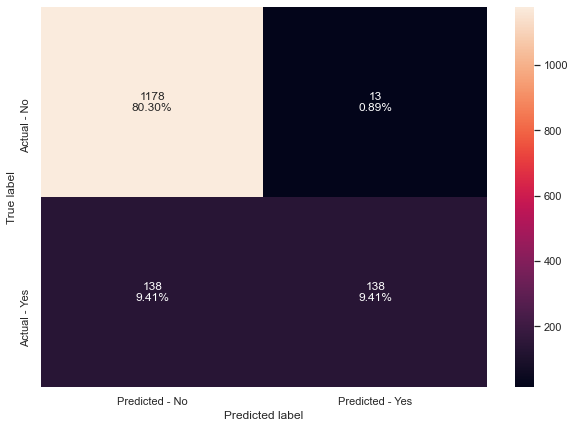

In [114]:
make_confusion_matrix(bagging_estimator,y_test)

In [115]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)


Accuracy on training set :  1.0
Accuracy on test set :  0.8970688479890934
Precision on training set :  1.0
Precision on test set :  0.9139072847682119
Recall on training set :  1.0
Recall on test set :  0.5


Precision has improved .Accuracy is also good.

#### Tuning Random Forest

In [137]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='precision',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, n_estimators=501,
                       random_state=1)

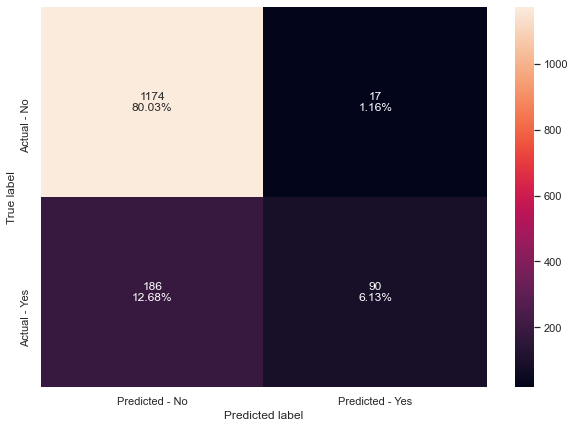

In [138]:
make_confusion_matrix(rf_estimator,y_test)

In [139]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)


Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.8616223585548739
Precision on training set :  1.0
Precision on test set :  0.8411214953271028
Recall on training set :  0.9968944099378882
Recall on test set :  0.32608695652173914


Tuning Random Forest seems to overfit the data 

### Comparing all Models for Decision Tree,Bagging Classifier and Random Forest with and without Tuning

In [140]:
# defining list of models
models = [dtree,bagging,bagging_wt,rf,rf_wt,dtree_estimator,bagging_estimator,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [141]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Bagging Classifier','Bagging Classifier with weighted decision tree',
                                          'Random Forest','RandomForest With Class weigths','Tuned Decision Tree','Tuned Bagging Classifier','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test
                                          }) 

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,Decision Tree,1.000000,0.864349,1.000000,0.647510,1.000000,0.612319
1,Bagging Classifier,0.990061,0.889571,0.993528,0.816667,0.953416,0.532609
2,Bagging Classifier with weighted decision tree,0.990354,0.886844,0.996748,0.857143,0.951863,0.478261
3,Random Forest,1.000000,0.881391,1.000000,0.886364,1.000000,0.423913
4,RandomForest With Class weigths,1.000000,0.873892,1.000000,0.895652,1.000000,0.373188
5,Tuned Decision Tree,0.786904,0.809816,0.447853,0.495298,0.566770,0.572464
6,Tuned Bagging Classifier,1.000000,0.897069,1.000000,0.913907,1.000000,0.500000
7,Tuned Random Forest,0.999415,0.861622,1.000000,0.841121,0.996894,0.326087


 Tuned Bagging classifier has the highest precision and good accuracy followed by Random Forest with class weights

### Feature Importance of Random Forest with class weights

In [629]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf_wt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
MonthlyIncome                      0.161615
Age                                0.142095
Passport_1                         0.083031
Designation_Executive              0.040144
CityTier_3                         0.037731
Gender_Male                        0.034036
PreferredLoginDevice_Self Enquiry  0.030665
MaritalStatus_Single               0.030518
PreferredPropertyStar_5.0          0.028216
OwnCar_1                           0.027021
PreferredPropertyStar_4.0          0.025297
MaritalStatus_Married              0.024851
NumberOfTrips_2.0                  0.024343
Occupation_Salaried                0.023652
Designation_Manager                0.023001
Occupation_Small Business          0.022724
NumberOfChildrenVisited_1.0        0.022258
NumberOfTrips_3.0                  0.020148
NumberOfPersonVisited_3            0.019408
MaritalStatus_Unmarried            0.018972
NumberOfPersonVisited_2            0.017756
NumberOfChildrenVisited_2.0     

In [630]:
feature_names = X_train.columns

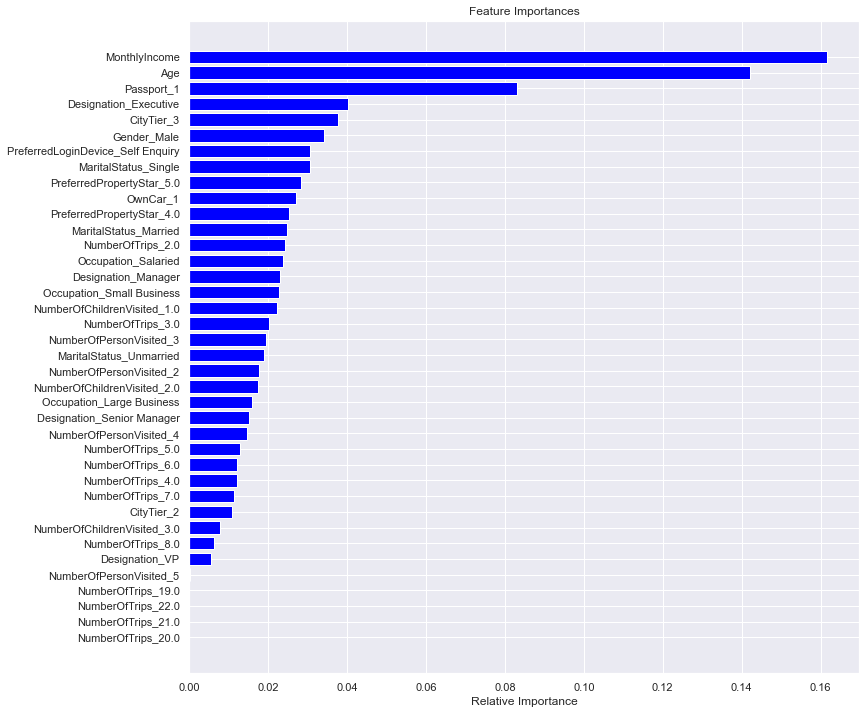

In [631]:
importances = rf_wt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Monthly Income,Age,having passport,Designation of Executive andcity_tier3 are top 5 features selected by Random Forest with
class weights model

## <a id = "link9"></a>Model Building Boosting - Adaboost, Gradient Boost,XGBoost

#### AdaBoost Classifier

In [176]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

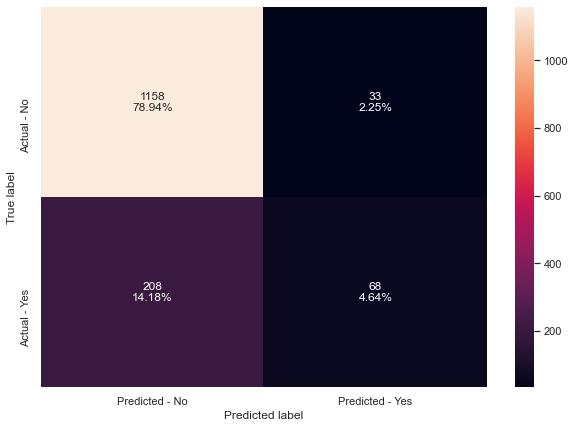

In [177]:
make_confusion_matrix(abc,y_test)

In [178]:
#Using above defined function to get accuracy,Recall and Precision on train and test set
abc_acc = get_accuracy_score(abc)
abc_precision = get_precision_score(abc)
abc_recall = get_recall_score(abc)

Accuracy on training set :  0.844489915229465
Accuracy on test set :  0.8357191547375596
Precision on training set :  0.7616822429906542
Precision on test set :  0.6732673267326733
Recall on training set :  0.2531055900621118
Recall on test set :  0.2463768115942029


Accuracy and Precision seems to be good.Recall is not good

#### Gradient Boosting Classifier

In [179]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

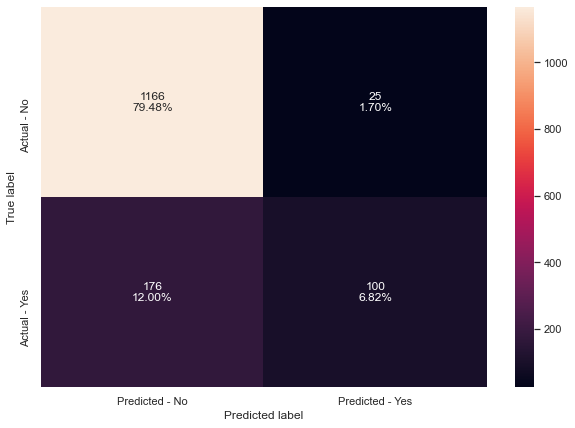

In [180]:
make_confusion_matrix(gbc,y_test)

In [181]:
#Using above defined function to get accuracy,precision and recall on train and test set
gbm_acc = get_accuracy_score(gbc)
gbm_precision = get_precision_score(gbc)
gbm_recall = get_recall_score(gbc)

Accuracy on training set :  0.8821981876644256
Accuracy on test set :  0.8629856850715747
Precision on training set :  0.877742946708464
Precision on test set :  0.8
Recall on training set :  0.43478260869565216
Recall on test set :  0.36231884057971014


Precision and recall looks better than Adaboost model

#### XGBoost Classifier

In [182]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

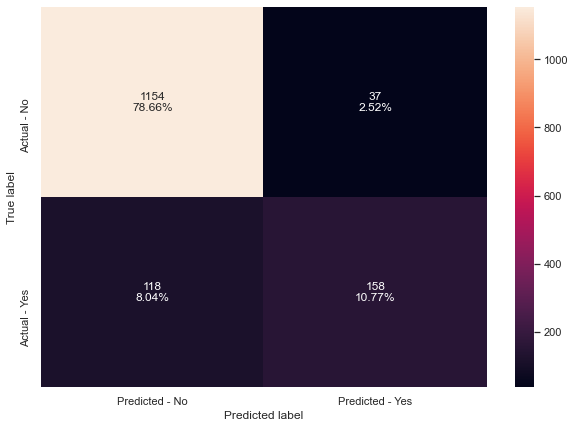

In [183]:
make_confusion_matrix(xgb,y_test)

In [184]:
#Using above defined function to get accuracy,precision and recall on train and test set
xgb_acc = get_accuracy_score(xgb)
xgb_precision = get_precision_score(xgb)
xgb_recall = get_recall_score(xgb)

Accuracy on training set :  0.9961999415375621
Accuracy on test set :  0.8943421949556919
Precision on training set :  1.0
Precision on test set :  0.8102564102564103
Recall on training set :  0.9798136645962733
Recall on test set :  0.572463768115942


XGboost seems to do well on the data but there is overfitting

## <a id = "link10"></a>Model Performance Evaluation and Improvement-Boosting


* Customer purchased package and model predicted customer will purchase travel package :  True Positive (observed=1,predicted=1)

* Customer did not purchase package and model predicted customer will purchase travel package  : False Postive (observed=0,predicted=1)

* Customer didnot purchase package and model predicted customer will not purchase travel package : True Negative (observed=0,predicted=0)

* Customer purchased package and model predicted customer will not purchase travel package  : False Negative (observed=1,predicted=0)


**Precision is the right metric for our case**.Company wants Precision to be maximized, greater the Precision higher the chances of minimizing false positives. Hence, the focus should be on increasing Precision or minimizing the false positives or in other words identifying the true positives,so that the company can focus on customers who will actually purchase the travel package and hence reduce marketing cost for the company


### Lets see if we can improve model performance further by tuning the Models

### Hyperparameter Tuning

#### AdaBoost Classifier

In [185]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=100, random_state=1)

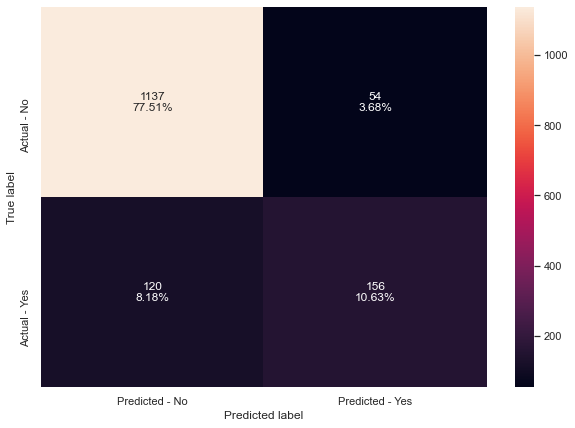

In [186]:
make_confusion_matrix(abc_tuned,y_test)

In [187]:
#Using above defined function to get accuracy,precision,recall on train and test set
tuned_abc_acc = get_accuracy_score(abc_tuned)
tuned_abc_precision = get_precision_score(abc_tuned)
tuned_abc_recall = get_recall_score(abc_tuned)

Accuracy on training set :  0.9731072785735165
Accuracy on test set :  0.8813905930470347
Precision on training set :  0.9646464646464646
Precision on test set :  0.7428571428571429
Recall on training set :  0.889751552795031
Recall on test set :  0.5652173913043478


There seems to be overfitting after AdaBoost Tuning

#### Gradient Boosting Classifier

**Using AdaBoost classifier as the estimator for intial predictions**

In [188]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

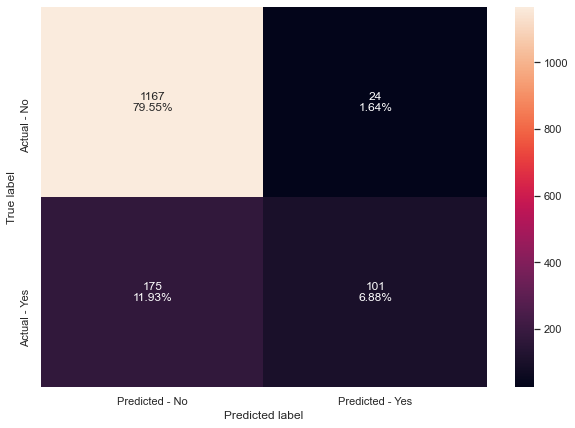

In [189]:
make_confusion_matrix(gbc_init,y_test)

In [190]:
#Using above defined function to get accuracy,precision,recall on train and test set
gbc_acc_init = get_accuracy_score(gbc_init)
gbc_acc_precision = get_precision_score(gbc_init)
gbc_acc_recall = get_recall_score(gbc_init)

Accuracy on training set :  0.8795673779596609
Accuracy on test set :  0.8643490115882754
Precision on training set :  0.8670886075949367
Precision on test set :  0.808
Recall on training set :  0.4254658385093168
Recall on test set :  0.36594202898550726


Gradient Boosting with Adaboost as base estimator is giving good predictions and there is no overfitting

#### Gradient Boosting Classifier

In [191]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations


# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

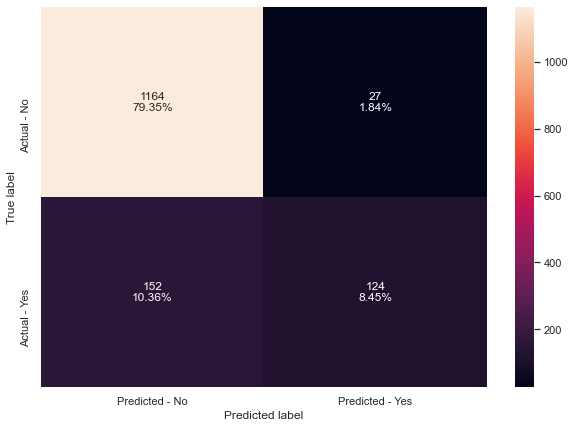

In [192]:
make_confusion_matrix(gbc_tuned,y_test)

In [193]:
#Using above defined function to get accuracy on train and test set
tuned_gbc_acc = get_accuracy_score(gbc_tuned)
tuned_gbc_precision = get_precision_score(gbc_tuned)
tuned_gbc_recall = get_recall_score(gbc_tuned)

Accuracy on training set :  0.9082139725226542
Accuracy on test set :  0.8779822767552828
Precision on training set :  0.9187817258883249
Precision on test set :  0.8211920529801324
Recall on training set :  0.562111801242236
Recall on test set :  0.4492753623188406


Precision has increased with Tuning

#### XGBoost Classifier

In [194]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [195]:
# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=6,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

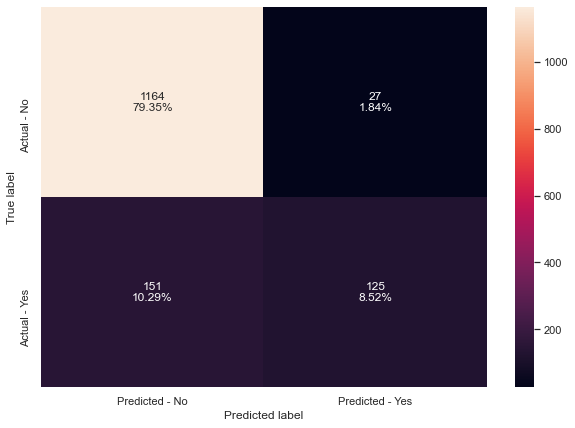

In [196]:
make_confusion_matrix(xgb_tuned,y_test)

In [197]:
#Using above defined function to get accuracy,precision and recall on train and test set
tuned_xgb_acc = get_accuracy_score(xgb_tuned)
tuned_xgb_precision = get_precision_score(xgb_tuned)
tuned_xgb_recall = get_recall_score(xgb_tuned)

Accuracy on training set :  0.9348143817597194
Accuracy on test set :  0.8786639400136332
Precision on training set :  0.9751693002257337
Precision on test set :  0.8223684210526315
Recall on training set :  0.6708074534161491
Recall on test set :  0.4528985507246377


There is overfitting on data as with original XBG Model

## <a id = "link11"></a> Stacking Classifier

In [198]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [199]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

[09:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=3,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features='log2',
                                                       max_samples=0.7,
                                                       n_estimators=501,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostC

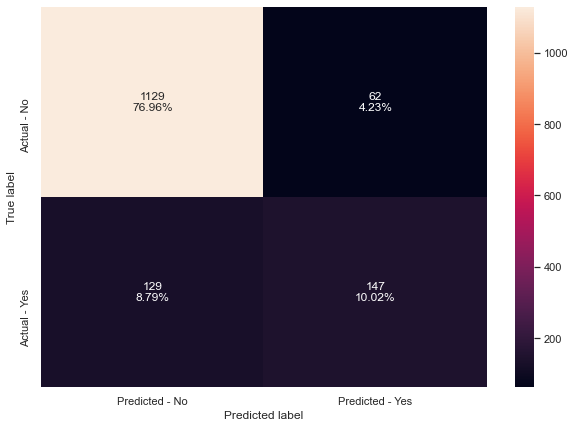

In [200]:
make_confusion_matrix(stacking_estimator,y_test)

In [201]:
stacked_acc = get_accuracy_score(stacking_estimator)
stacked_precision = get_precision_score(stacking_estimator)
stacked_recall = get_recall_score(stacking_estimator)

Accuracy on training set :  0.9950306927798889
Accuracy on test set :  0.8698023176550784
Precision on training set :  0.9984101748807631
Precision on test set :  0.7033492822966507
Recall on training set :  0.9751552795031055
Recall on test set :  0.532608695652174


In [ ]:
Stacking classifier is overfitting the data

### Comparing all Models

In [202]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator,abc,gbc,xgb,abc_tuned,gbc_init,gbc_tuned,xgb_tuned,stacking_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
pres_train =[]
pres_test =[]
recall_train =[]
recall_test =[]

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    k = get_precision_score(model,False)
    pres_train.append(k[0])
    pres_test.append(k[1])
    l = get_recall_score(model,False)
    recall_train.append(l[0])
    recall_test.append(l[1])

In [203]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier','Bagging Classifier with weighted decision tree',
                                          'Tuned Bagging Classifier',
                                          'Random Forest','Random Forest with class weights','Tuned Random Forest','Adaboost Classifier',
                                          'Gradient Boosting Classifier','XGBoost classifier',
                                          'Tuned Adaboost Classifier','Gradient Boosting Classifier with Adaboost'
                                          ,'Tuned Gradient Boosting Classifier',
                                          'Tuned XGBoost Classifier','Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Precision':pres_train,
                                          'Test_Precision':pres_test,
                                          'Train_Recall':recall_train,
                                          'Test_Recall':recall_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,Decision Tree,1.000000,0.864349,1.000000,0.647510,1.000000,0.612319
1,Tuned Decision Tree,0.786904,0.809816,0.447853,0.495298,0.566770,0.572464
2,Bagging Classifier,0.990061,0.889571,0.993528,0.816667,0.953416,0.532609
3,Bagging Classifier with weighted decision tree,0.990354,0.886844,0.996748,0.857143,0.951863,0.478261
4,Tuned Bagging Classifier,1.000000,0.897069,1.000000,0.913907,1.000000,0.500000
5,Random Forest,1.000000,0.881391,1.000000,0.886364,1.000000,0.423913
6,Random Forest with class weights,1.000000,0.873892,1.000000,0.895652,1.000000,0.373188
7,Tuned Random Forest,0.999415,0.861622,1.000000,0.841121,0.996894,0.326087
8,Adaboost Classifier,0.844490,0.835719,0.761682,0.673267,0.253106,0.246377
9,Gradient Boosting Classifier,0.882198,0.862986,0.877743,0.800000,0.434783,0.362319


* Tuned Bagging Classifier & Random Forest with class weight is giving good performance here
* Tuned Gradient Boosting Classifier has comparable accuracy ,precision and recall.
* Random Forest is also giving good performance

**We have explored feature importance of Random Forest in the earlier section.Lets us now analyse Feature Importance of Tuned Gradient Boosting Classifier and Random Forest**

### Feature Importance of Tuned Gradient Boost Classifier

In [204]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
MonthlyIncome                      0.246584
Age                                0.148059
Passport_1                         0.137356
Designation_Executive              0.103264
CityTier_3                         0.059263
MaritalStatus_Single               0.053731
MaritalStatus_Unmarried            0.031392
PreferredPropertyStar_5.0          0.023760
NumberOfTrips_7.0                  0.020567
CityTier_2                         0.019214
Designation_Senior Manager         0.018426
Designation_Manager                0.018321
Occupation_Large Business          0.015755
PreferredPropertyStar_4.0          0.012008
PreferredLoginDevice_Self Enquiry  0.009731
MaritalStatus_Married              0.008872
Gender_Male                        0.007683
NumberOfTrips_8.0                  0.006957
NumberOfTrips_6.0                  0.006938
NumberOfPersonVisited_3            0.005811
NumberOfPersonVisited_2            0.005723
Occupation_Small Business       

In [205]:
feature_names = X_train.columns

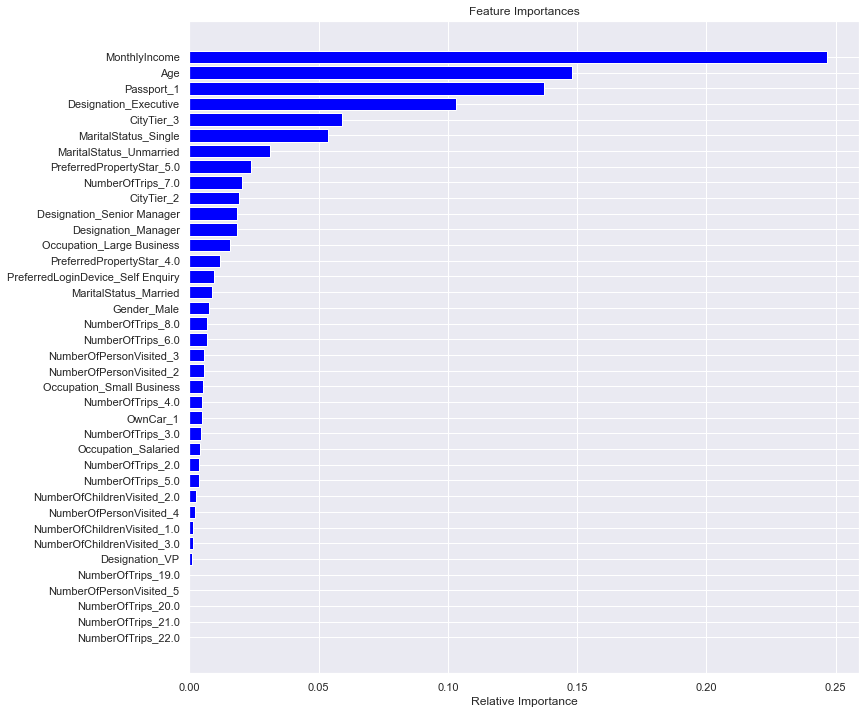

In [206]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Feature Importance of Random Forest

In [638]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
MonthlyIncome                      0.167607
Age                                0.155261
Passport_1                         0.073783
Designation_Executive              0.035659
CityTier_3                         0.033701
Gender_Male                        0.032943
MaritalStatus_Single               0.032367
PreferredLoginDevice_Self Enquiry  0.032103
OwnCar_1                           0.030011
PreferredPropertyStar_5.0          0.026960
PreferredPropertyStar_4.0          0.025878
NumberOfChildrenVisited_1.0        0.024095
NumberOfTrips_2.0                  0.024039
Occupation_Small Business          0.022241
Occupation_Salaried                0.021786
MaritalStatus_Married              0.021174
NumberOfPersonVisited_3            0.019673
MaritalStatus_Unmarried            0.019381
NumberOfTrips_3.0                  0.019377
Designation_Manager                0.018931
NumberOfChildrenVisited_2.0        0.018296
NumberOfPersonVisited_2         

In [639]:
feature_names = X_train.columns

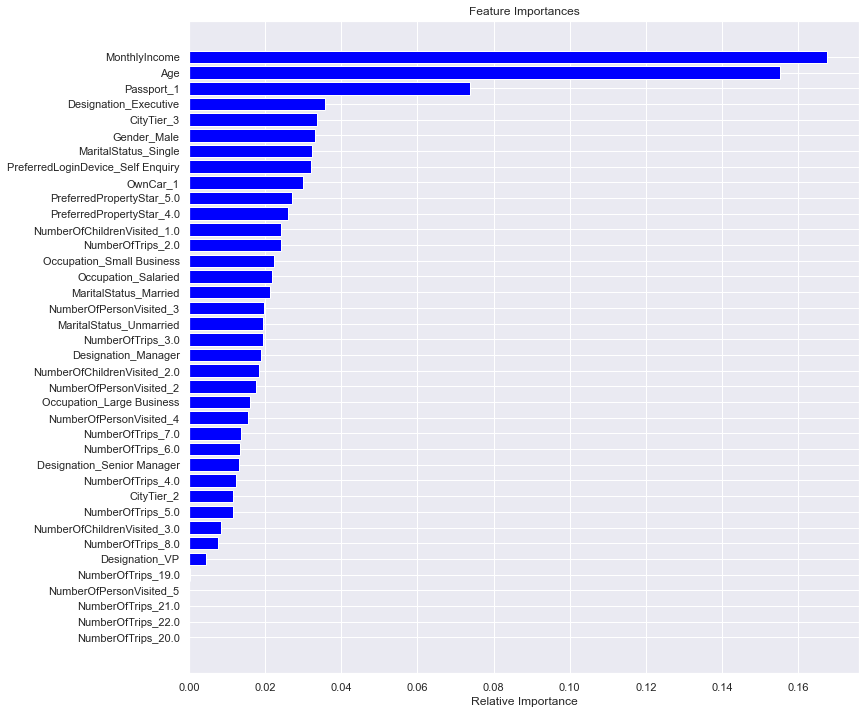

In [641]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## <a id = "link12"></a>Business Recommendations and Insights

When using the model to predict which customers will buy the travel package when offered below factors need to be given importance
* As per the model suggestions the company should target customers with monthly income of up to 40,000 and Age below 40
* Those in city tier 3 can be target for marketing as suggestions show they have higher chance of purchasing the travel package
* Also customers who are in Manager designation has to be target for Marketing 
* Customers who are single are showing greater chances of purchasing the package
* Having a passport ,owning a car ,having a business are few other factors which leads customers into buying a travel package
* Those customers who prefer 5 star properties can also be targeted to buy travel package

Factors from customer interaction data which will boost the chances of the customer buying the travel package that needs to be considered are:
* Having a higher duration of pitch by salesman to the customer
* Getting a PitchSatisfactionScore of 3 or 5 
* Having ,multiple follow ups with the customer.Having 6 follow ups with the customer showed a good chance of the customer purchasing the travel package
